In [1]:
# Notebook Size

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [231]:
# Display all data when printing df

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [232]:
# Download Plots - High resolution

# plt.savefig('/Users/ahmad/Downloads/name', dpi=300)

# plt.savefig('/enter/file/path/name', dpi=300)

In [3]:
# Modules

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# Fig 9: Control Site Plot over 14 days

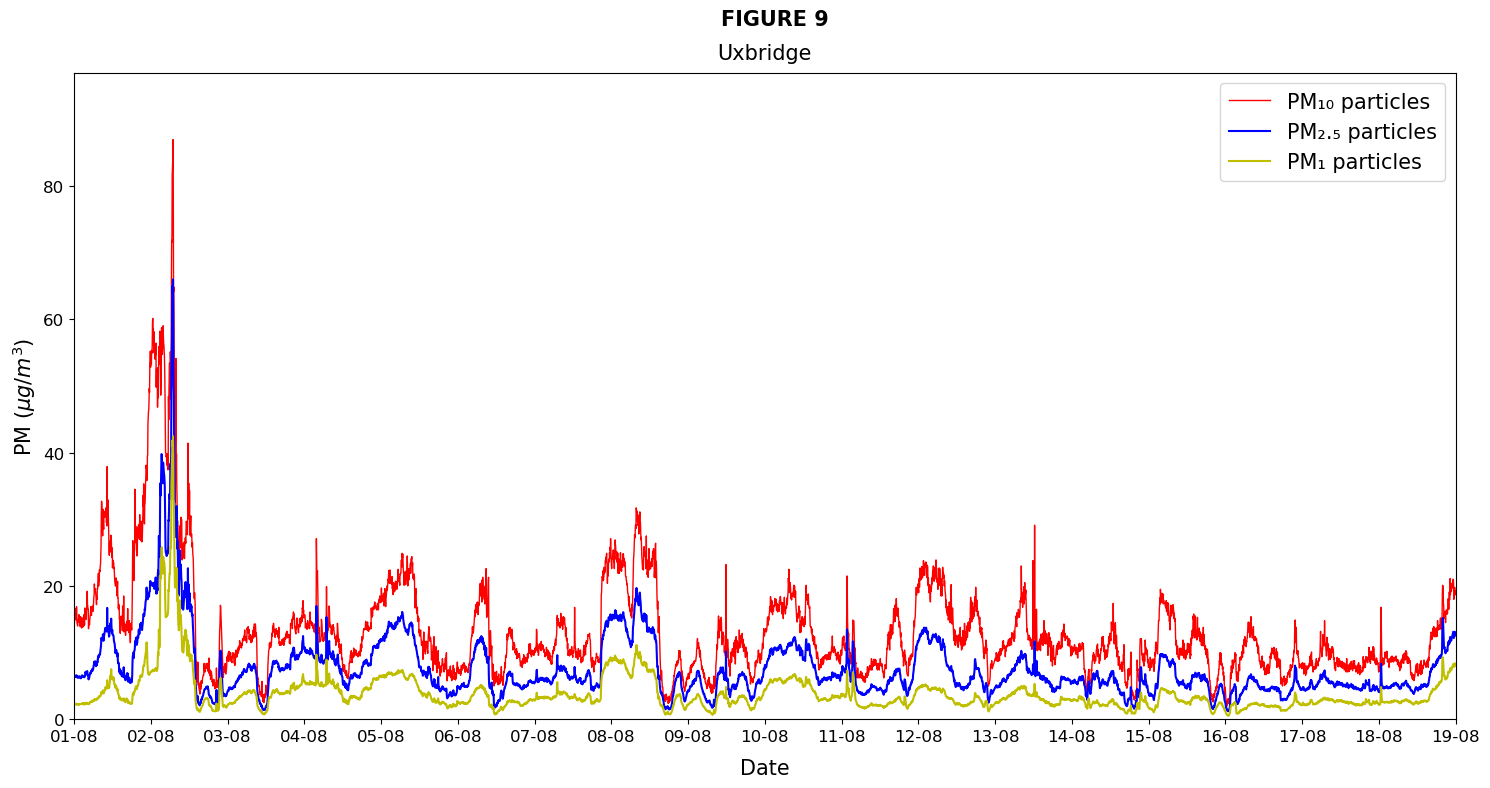

In [20]:
''' Control Site Plot over 14 days '''

folder_path = '/Users/ahmad/Documents/NERC Internship/Data/Excel/Actual Data/Dust/Control Site'

all_dfs = []

# Loop through all files in the directory
for file_name in os.listdir(folder_path):
    if file_name.endswith('.xlsx'):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_excel(file_path, engine='openpyxl')
        df['Date Time'] = pd.to_datetime(df['Date Time'], dayfirst=True, errors='coerce')
        all_dfs.append(df)

combined_df = pd.concat(all_dfs)

# Drop rows with invalid dates and remove duplicates
combined_df = combined_df.dropna(subset=['Date Time'])
combined_df = combined_df.drop_duplicates(subset=['Date Time'])

combined_df = combined_df.sort_values(by='Date Time')

plt.figure(figsize=(15, 8))

# Plot the combined data
plt.plot(combined_df['Date Time'], combined_df['PM10 particles (ug/m^3)'], label='PM₁₀ particles', color="r", linewidth = '1')
plt.plot(combined_df['Date Time'], combined_df['PM2.5 particles (ug/m^3)'], label='PM₂.₅ particles', color="b")
plt.plot(combined_df['Date Time'], combined_df['PM1 particles (ug/m^3)'], label='PM₁ particles', color="y")

# Axis Labels
plt.title('Uxbridge', fontsize=15, pad=10)
plt.suptitle('FIGURE 9', fontweight='bold', fontsize=15,x=0.52, y=0.98)
plt.xlabel('Date', fontsize=15, labelpad=10)
plt.ylabel('PM ($μg/m^{3}$)', fontsize=15)
plt.legend(fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Limits for x and y axis
plt.xlim(combined_df['Date Time'].min(), combined_df['Date Time'].min() + pd.Timedelta(days=18))
plt.ylim(0, combined_df[['PM10 particles (ug/m^3)', 'PM2.5 particles (ug/m^3)', 'PM1 particles (ug/m^3)']].max().max() + 10)

plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_minor_locator(mdates.HourLocator(interval=24))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

plt.gca().yaxis.set_major_locator(plt.MultipleLocator(20))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(20))

plt.savefig('/Users/ahmad/Pictures/NERC/Figures/Figure_9', dpi=300)

plt.tight_layout()
plt.show()

# Fig 10: Test Site Plot over 14 days

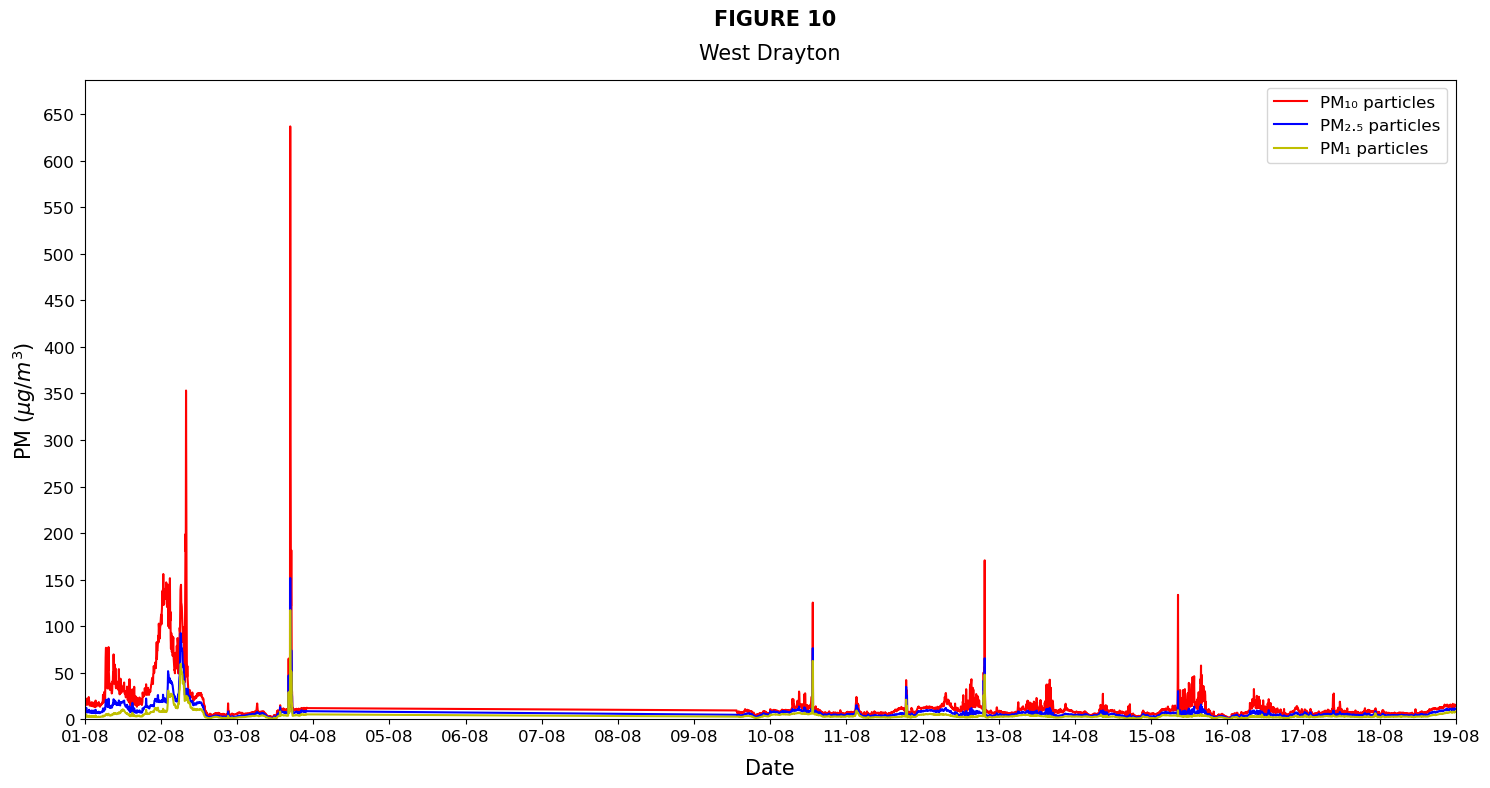

In [21]:
''' Test Site Plot over 14 days '''

folder_path = '/Users/ahmad/Documents/NERC Internship/Data/Excel/Actual Data/Dust/Test Site'

all_dfs = []

# Loop through all files in the directory
for file_name in os.listdir(folder_path):
    if file_name.endswith('.xlsx'):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_excel(file_path, engine='openpyxl')
        df['Date Time'] = pd.to_datetime(df['Date Time'], dayfirst=True, errors='coerce')
        all_dfs.append(df)

combined_df = pd.concat(all_dfs)

# Drop rows with invalid dates and remove duplicates
combined_df = combined_df.dropna(subset=['Date Time'])
combined_df = combined_df.drop_duplicates(subset=['Date Time'])

combined_df = combined_df.sort_values(by='Date Time')

plt.figure(figsize=(15, 8))

# Plot the combined data
plt.plot(combined_df['Date Time'], combined_df['PM10 particles (ug/m^3)'], label='PM₁₀ particles', color="r")
plt.plot(combined_df['Date Time'], combined_df['PM2.5 particles (ug/m^3)'], label='PM₂.₅ particles', color="b")
plt.plot(combined_df['Date Time'], combined_df['PM1 particles (ug/m^3)'], label='PM₁ particles', color="y")

# Axis Labels
plt.title('West Drayton', fontsize=15, pad=15)
plt.suptitle('FIGURE 10', fontweight='bold', fontsize=15,x=0.52, y=0.98)
plt.xlabel('Date', fontsize=15, labelpad=10)
plt.ylabel('PM ($μg/m^{3}$)', fontsize=15)
plt.legend(fontsize=12)

# x and y axis font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Limits for x and y axis
plt.xlim(combined_df['Date Time'].min(), combined_df['Date Time'].min() + pd.Timedelta(days=18))
plt.ylim(0, combined_df[['PM10 particles (ug/m^3)', 'PM2.5 particles (ug/m^3)', 'PM1 particles (ug/m^3)']].max().max() + 50)

plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_minor_locator(mdates.HourLocator(interval=24))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

plt.gca().yaxis.set_major_locator(plt.MultipleLocator(50))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(50))

plt.savefig('/Users/ahmad/Pictures/NERC/Figures/Figure_10', dpi=300)

plt.tight_layout()
plt.show()

# Fig 11: PM10 Control vs Test Site

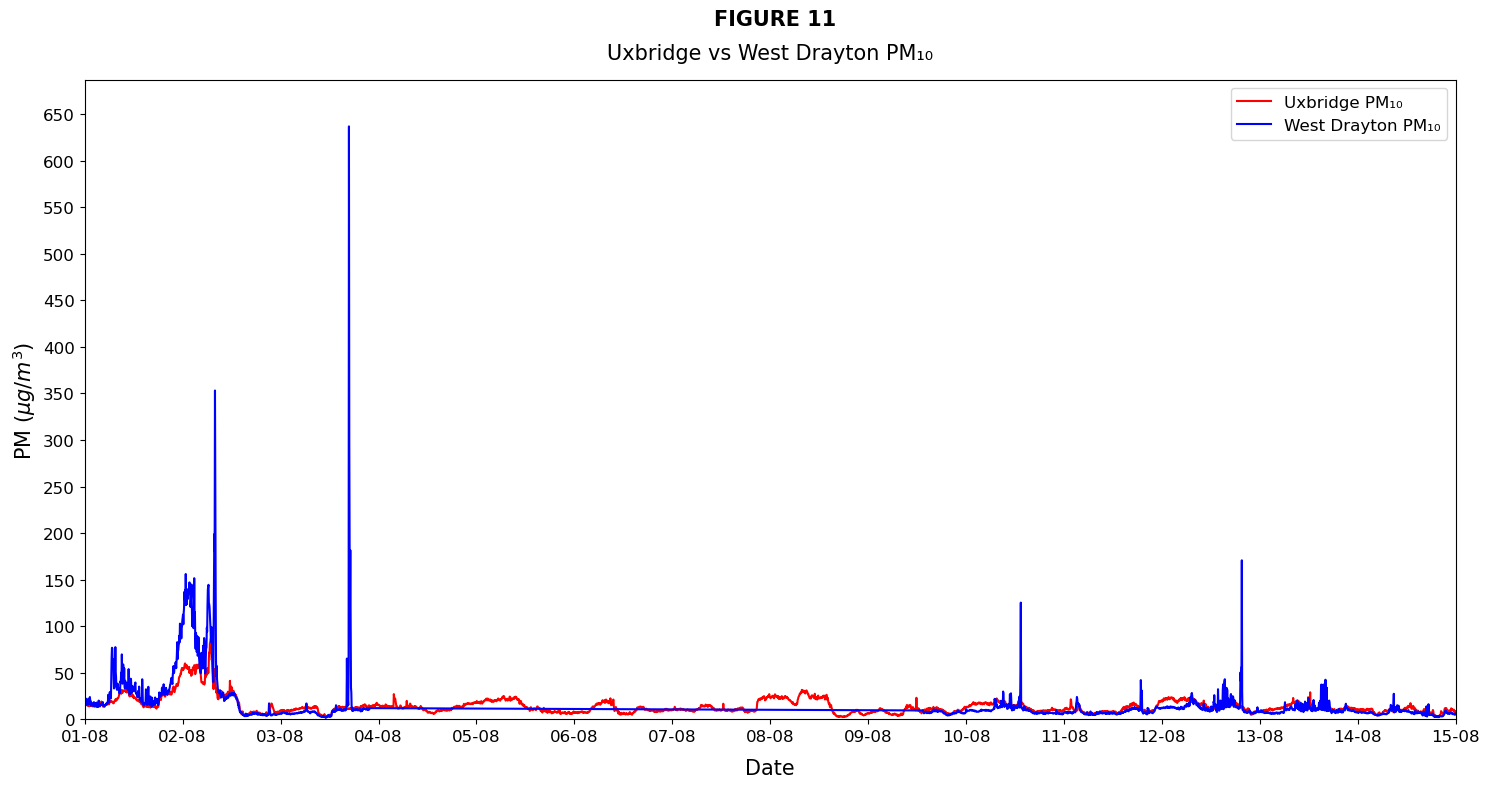

In [23]:
''' PM10 Control vs Test Site '''

folder_paths = [
    '/Users/ahmad/Documents/NERC Internship/Data/Excel/Actual Data/Dust/Control Site',
    '/Users/ahmad/Documents/NERC Internship/Data/Excel/Actual Data/Dust/Test Site'
]

# Separate dataframes for each directory
dfs = {folder_paths[0]: [], folder_paths[1]: []}

# Loop through all folders and subfolders
for folder_path in folder_paths:
    for root, dirs, files in os.walk(folder_path):
        for file_name in files:
            if file_name.endswith('.xlsx'):
                file_path = os.path.join(root, file_name)
                df = pd.read_excel(file_path, engine='openpyxl')
                df['Date Time'] = pd.to_datetime(df['Date Time'], dayfirst=True, errors='coerce')
                dfs[folder_path].append(df)

# Combine all dataframes for each directory
combined_dfs = {}
for folder_path in folder_paths:
    combined_dfs[folder_path] = pd.concat(dfs[folder_path], ignore_index=True)
    # Drop rows with invalid dates and remove duplicates
    combined_dfs[folder_path] = combined_dfs[folder_path].dropna(subset=['Date Time'])
    combined_dfs[folder_path] = combined_dfs[folder_path].drop_duplicates(subset=['Date Time'])

    # Sort by date
    combined_dfs[folder_path] = combined_dfs[folder_path].sort_values(by='Date Time')

# Plot the data
plt.figure(figsize=(15, 8))

# Plot Control Site
plt.plot(combined_dfs[folder_paths[0]]['Date Time'], combined_dfs[folder_paths[0]]['PM10 particles (ug/m^3)'], label='Uxbridge PM₁₀', color="r")

# Plot Test Site
plt.plot(combined_dfs[folder_paths[1]]['Date Time'], combined_dfs[folder_paths[1]]['PM10 particles (ug/m^3)'], label='West Drayton PM₁₀', color="b")

# Axis Labels
plt.title('Uxbridge vs West Drayton PM₁₀', fontsize=15, pad=15)
plt.suptitle('FIGURE 11', fontweight='bold', fontsize=15,x=0.52, y=0.98)
plt.xlabel('Date', fontsize=15, labelpad=10)
plt.ylabel('PM ($μg/m^{3}$)', fontsize=15)
plt.legend(fontsize=12)

# x and y axis font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Limits for x and y axis
plt.xlim(min(combined_dfs[folder_paths[0]]['Date Time'].min(), combined_dfs[folder_paths[1]]['Date Time'].min()),
         min(combined_dfs[folder_paths[0]]['Date Time'].min(), combined_dfs[folder_paths[1]]['Date Time'].min()) + pd.Timedelta(days=14))
plt.ylim(0, max(combined_dfs[folder_paths[0]]['PM10 particles (ug/m^3)'].max(), combined_dfs[folder_paths[1]]['PM10 particles (ug/m^3)'].max()) + 50)

plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_minor_locator(mdates.HourLocator(interval=24))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

plt.gca().yaxis.set_major_locator(plt.MultipleLocator(50))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(50))

plt.savefig('/Users/ahmad/Pictures/NERC/Figures/Figure_11', dpi=300)

plt.tight_layout()
plt.show()

# Fig 12: PM2.5 Control vs Test Site

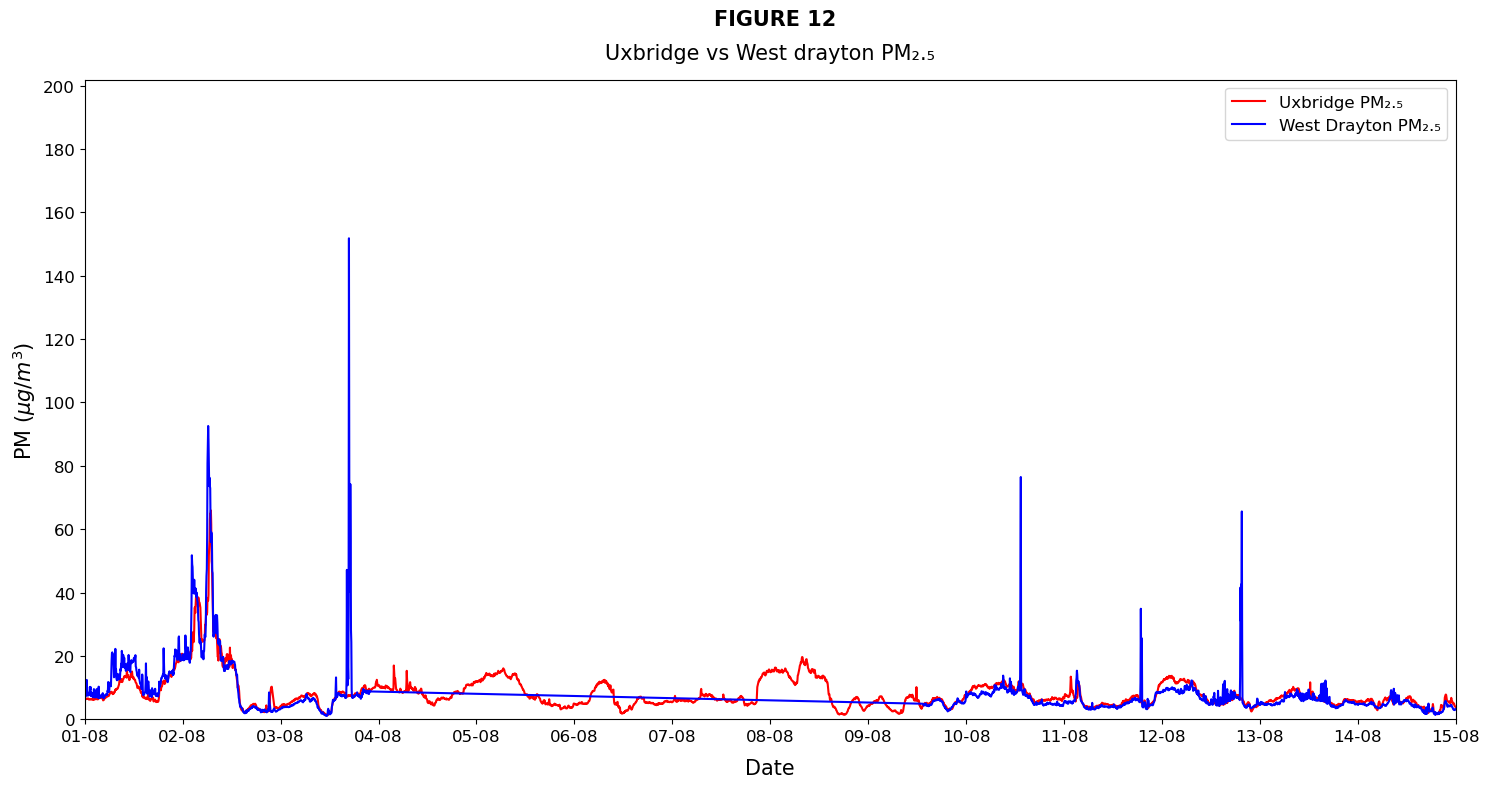

In [24]:
''' PM2.5 Control vs Test Site '''

folder_paths = [
    '/Users/ahmad/Documents/NERC Internship/Data/Excel/Actual Data/Dust/Control Site',
    '/Users/ahmad/Documents/NERC Internship/Data/Excel/Actual Data/Dust/Test Site'
]

# Separate dataframes for each directory
dfs = {folder_paths[0]: [], folder_paths[1]: []}

# Loop through all folders and subfolders
for folder_path in folder_paths:
    for root, dirs, files in os.walk(folder_path):
        for file_name in files:
            if file_name.endswith('.xlsx'):
                file_path = os.path.join(root, file_name)
                df = pd.read_excel(file_path, engine='openpyxl')
                df['Date Time'] = pd.to_datetime(df['Date Time'], dayfirst=True, errors='coerce')
                dfs[folder_path].append(df)
                
# Combine all dataframes for each directory
combined_dfs = {}
for folder_path in folder_paths:
    combined_dfs[folder_path] = pd.concat(dfs[folder_path], ignore_index=True)
    # Drop rows with invalid dates and remove duplicates
    combined_dfs[folder_path] = combined_dfs[folder_path].dropna(subset=['Date Time'])
    combined_dfs[folder_path] = combined_dfs[folder_path].drop_duplicates(subset=['Date Time'])
    # Sort by date
    combined_dfs[folder_path] = combined_dfs[folder_path].sort_values(by='Date Time')

# Plot the data
plt.figure(figsize=(15, 8))

# Plot Control Site
plt.plot(combined_dfs[folder_paths[0]]['Date Time'], combined_dfs[folder_paths[0]]['PM2.5 particles (ug/m^3)'], label='Uxbridge PM₂.₅', color="r")

# Plot Test Site
plt.plot(combined_dfs[folder_paths[1]]['Date Time'], combined_dfs[folder_paths[1]]['PM2.5 particles (ug/m^3)'], label='West Drayton PM₂.₅', color="b")

# Axis Labels
plt.title('Uxbridge vs West drayton PM₂.₅', fontsize=15, pad=15)
plt.suptitle('FIGURE 12', fontweight='bold', fontsize=15,x=0.52, y=0.98)
plt.xlabel('Date', fontsize=15, labelpad=10)
plt.ylabel('PM ($μg/m^{3}$)', fontsize=15)
plt.legend(fontsize=12)

# x and y axis font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Limits for x and y axis
plt.xlim(min(combined_dfs[folder_paths[0]]['Date Time'].min(), combined_dfs[folder_paths[1]]['Date Time'].min()),
         min(combined_dfs[folder_paths[0]]['Date Time'].min(), combined_dfs[folder_paths[1]]['Date Time'].min()) + pd.Timedelta(days=14))
plt.ylim(0, max(combined_dfs[folder_paths[0]]['PM2.5 particles (ug/m^3)'].max(), combined_dfs[folder_paths[1]]['PM2.5 particles (ug/m^3)'].max()) + 50)

plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_minor_locator(mdates.HourLocator(interval=1200))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

# y axis tick label spacing
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(20))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(20))

plt.savefig('/Users/ahmad/Pictures/NERC/Figures/Figure_12', dpi=300)

plt.tight_layout()
plt.show()


# Fig 13: PM1 Control vs Test Site

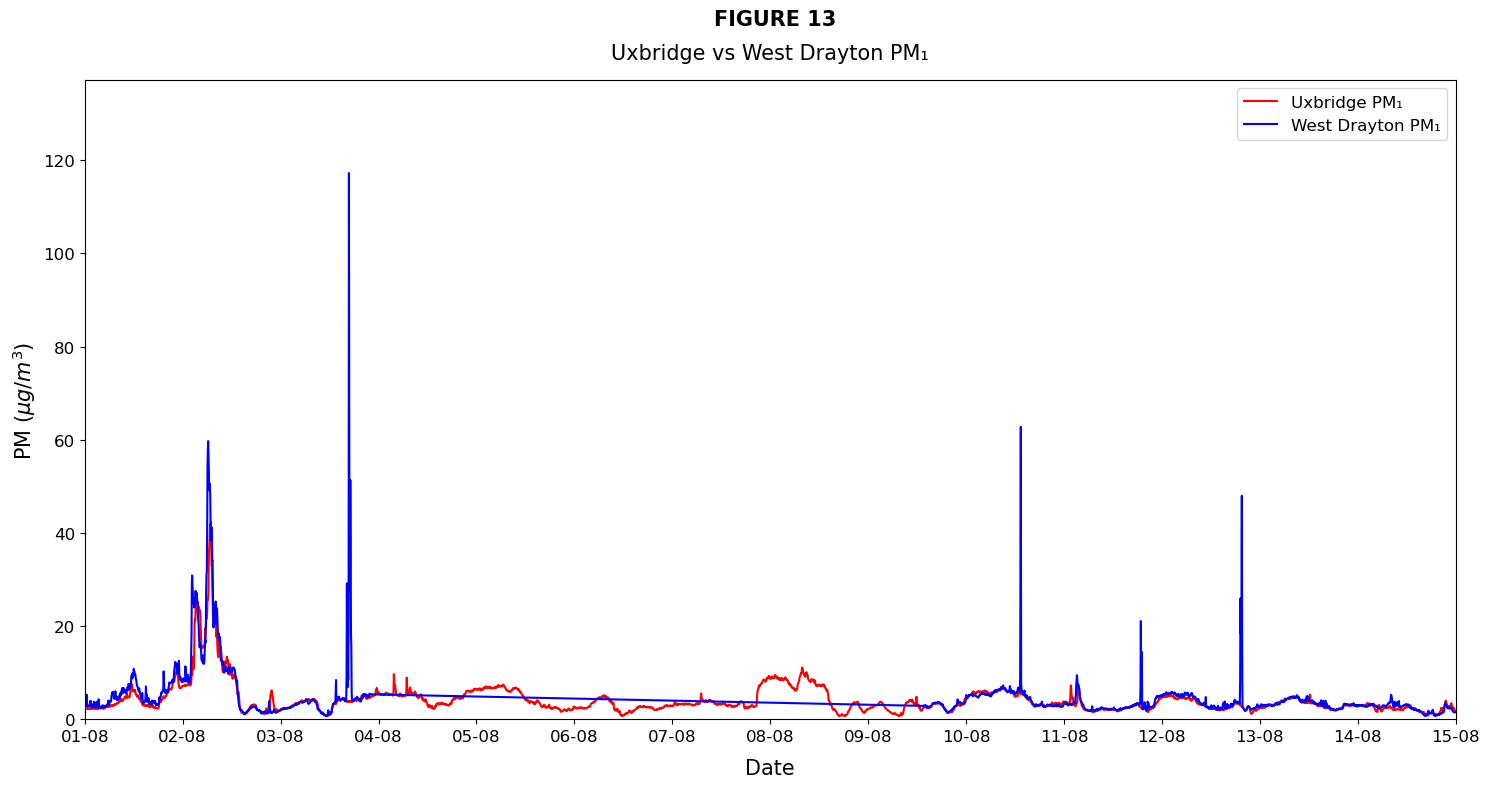

In [25]:
''' PM1 Control vs Test Site '''

folder_paths = [
    '/Users/ahmad/Documents/NERC Internship/Data/Excel/Actual Data/Dust/Control Site',
    '/Users/ahmad/Documents/NERC Internship/Data/Excel/Actual Data/Dust/Test Site'
]

# Separate dataframes for each directory
dfs = {folder_paths[0]: [], folder_paths[1]: []}

# Loop through all folders and subfolders
for folder_path in folder_paths:
    for root, dirs, files in os.walk(folder_path):
        for file_name in files:
            if file_name.endswith('.xlsx'):
                file_path = os.path.join(root, file_name)
                df = pd.read_excel(file_path, engine='openpyxl')
                df['Date Time'] = pd.to_datetime(df['Date Time'], dayfirst=True, errors='coerce')
                dfs[folder_path].append(df)

# Combine all dataframes for each directory
combined_dfs = {}
for folder_path in folder_paths:
    combined_dfs[folder_path] = pd.concat(dfs[folder_path], ignore_index=True)
    # Drop rows with invalid dates and remove duplicates
    combined_dfs[folder_path] = combined_dfs[folder_path].dropna(subset=['Date Time'])
    combined_dfs[folder_path] = combined_dfs[folder_path].drop_duplicates(subset=['Date Time'])
    # Sort by date
    combined_dfs[folder_path] = combined_dfs[folder_path].sort_values(by='Date Time')

# Plot the data
plt.figure(figsize=(15, 8))

# Plot Control Site
plt.plot(combined_dfs[folder_paths[0]]['Date Time'], combined_dfs[folder_paths[0]]['PM1 particles (ug/m^3)'], label='Uxbridge PM₁', color="r")

# Plot Test Site
plt.plot(combined_dfs[folder_paths[1]]['Date Time'], combined_dfs[folder_paths[1]]['PM1 particles (ug/m^3)'], label='West Drayton PM₁', color="b")

# Axis Labels
plt.title('Uxbridge vs West Drayton PM₁', fontsize=15, pad=15)
plt.suptitle('FIGURE 13', fontweight='bold', fontsize=15,x=0.52, y=0.98)
plt.xlabel('Date', fontsize=15, labelpad=10)
plt.ylabel('PM ($μg/m^{3}$)', fontsize=15)
plt.legend(fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Limits for x and y axis
plt.xlim(min(combined_dfs[folder_paths[0]]['Date Time'].min(), combined_dfs[folder_paths[1]]['Date Time'].min()),
         min(combined_dfs[folder_paths[0]]['Date Time'].min(), combined_dfs[folder_paths[1]]['Date Time'].min()) + pd.Timedelta(days=14))
plt.ylim(0, max(combined_dfs[folder_paths[0]]['PM1 particles (ug/m^3)'].max(), combined_dfs[folder_paths[1]]['PM1 particles (ug/m^3)'].max()) + 20)

plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_minor_locator(mdates.HourLocator(interval=1200))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))


plt.gca().yaxis.set_major_locator(plt.MultipleLocator(20))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(20))

plt.savefig('/Users/ahmad/Pictures/NERC/Figures/Figure_13', dpi=300)

plt.tight_layout()
plt.show()

# Fig 14: PM10 PM5 PM1 over 18 days in one line - Test Site

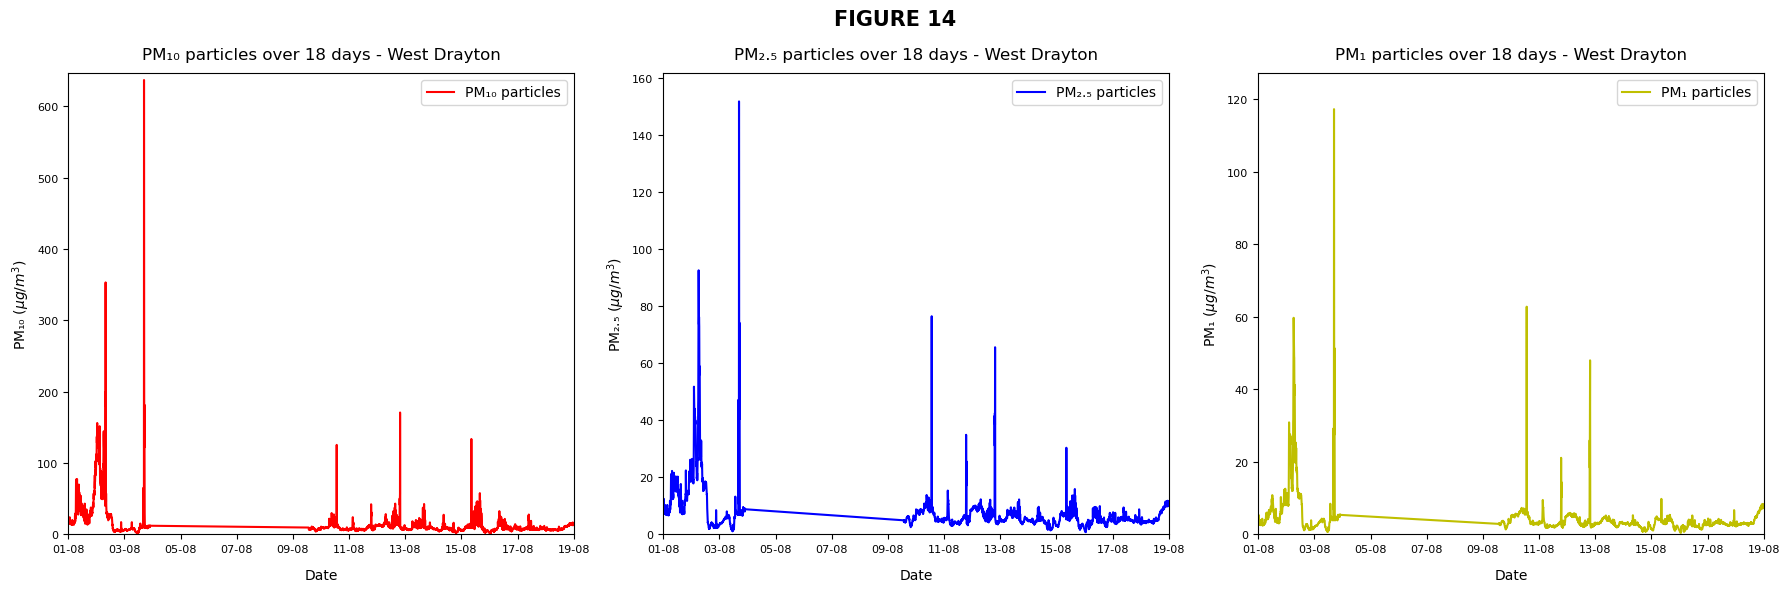

In [35]:
''' PM10 PM5 PM1 over 14 days in one line - Test Site '''

folder_path = '/Users/ahmad/Documents/NERC Internship/Data/Excel/Actual Data/Dust/Test Site'

all_dfs = []

# Loop through all files in the directory
for file_name in os.listdir(folder_path):
    if file_name.endswith('.xlsx'):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_excel(file_path, engine='openpyxl')
        df['Date Time'] = pd.to_datetime(df['Date Time'], dayfirst=True, errors='coerce')
        all_dfs.append(df)

combined_df = pd.concat(all_dfs)

# Drop rows with invalid dates and remove duplicates
combined_df = combined_df.dropna(subset=['Date Time'])
combined_df = combined_df.drop_duplicates(subset=['Date Time'])

combined_df = combined_df.sort_values(by='Date Time')

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot PM10
axs[0].plot(combined_df['Date Time'], combined_df['PM10 particles (ug/m^3)'], label='PM₁₀ particles', color="r")
axs[0].set_title('PM₁₀ particles over 18 days - West Drayton', fontsize=12, pad=10)
axs[0].set_xlabel('Date', fontsize=10, labelpad=10)
axs[0].set_ylabel('PM₁₀ ($μg/m^{3}$)', fontsize=10)
axs[0].legend(fontsize=10)
axs[0].tick_params(axis='both', which='major', labelsize=8)
axs[0].set_xlim(combined_df['Date Time'].min(), combined_df['Date Time'].min() + pd.Timedelta(days=18)) # change days to whatever time period needed
axs[0].set_ylim(0, combined_df['PM10 particles (ug/m^3)'].max() + 10)
axs[0].xaxis.set_major_locator(mdates.DayLocator(interval=2))
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

# Plot PM2.5
axs[1].plot(combined_df['Date Time'], combined_df['PM2.5 particles (ug/m^3)'], label='PM₂.₅ particles', color="b")
axs[1].set_title('PM₂.₅ particles over 18 days - West Drayton', fontsize=12, pad=10)
axs[1].set_xlabel('Date', fontsize=10, labelpad=10)
axs[1].set_ylabel('PM₂.₅ ($μg/m^{3}$)', fontsize=10)
axs[1].legend(fontsize=10)
axs[1].tick_params(axis='both', which='major', labelsize=8)
axs[1].set_xlim(combined_df['Date Time'].min(), combined_df['Date Time'].min() + pd.Timedelta(days=18)) # change days to whatever time period needed
axs[1].set_ylim(0, combined_df['PM2.5 particles (ug/m^3)'].max() + 10)
axs[1].xaxis.set_major_locator(mdates.DayLocator(interval=2))
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

# Plot PM1
axs[2].plot(combined_df['Date Time'], combined_df['PM1 particles (ug/m^3)'], label='PM₁ particles', color="y")
axs[2].set_title('PM₁ particles over 18 days - West Drayton', fontsize=12, pad=10)
axs[2].set_xlabel('Date', fontsize=10, labelpad=10)
axs[2].set_ylabel('PM₁ ($μg/m^{3}$)', fontsize=10)
axs[2].legend(fontsize=10)
axs[2].tick_params(axis='both', which='major', labelsize=8)
axs[2].set_xlim(combined_df['Date Time'].min(), combined_df['Date Time'].min() + pd.Timedelta(days=18)) # change days to whatever time period needed
axs[2].set_ylim(0, combined_df['PM1 particles (ug/m^3)'].max() + 10)
axs[2].xaxis.set_major_locator(mdates.DayLocator(interval=2))
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

plt.suptitle('FIGURE 14', fontweight='bold', fontsize=15,x=0.5, y=0.98)

plt.tight_layout()

plt.savefig('/Users/ahmad/Pictures/NERC/Figures/Figure_14', dpi=300)

plt.show()

# Fig 15: PM10 PM5 PM1 over 18 days in one line - Control Site

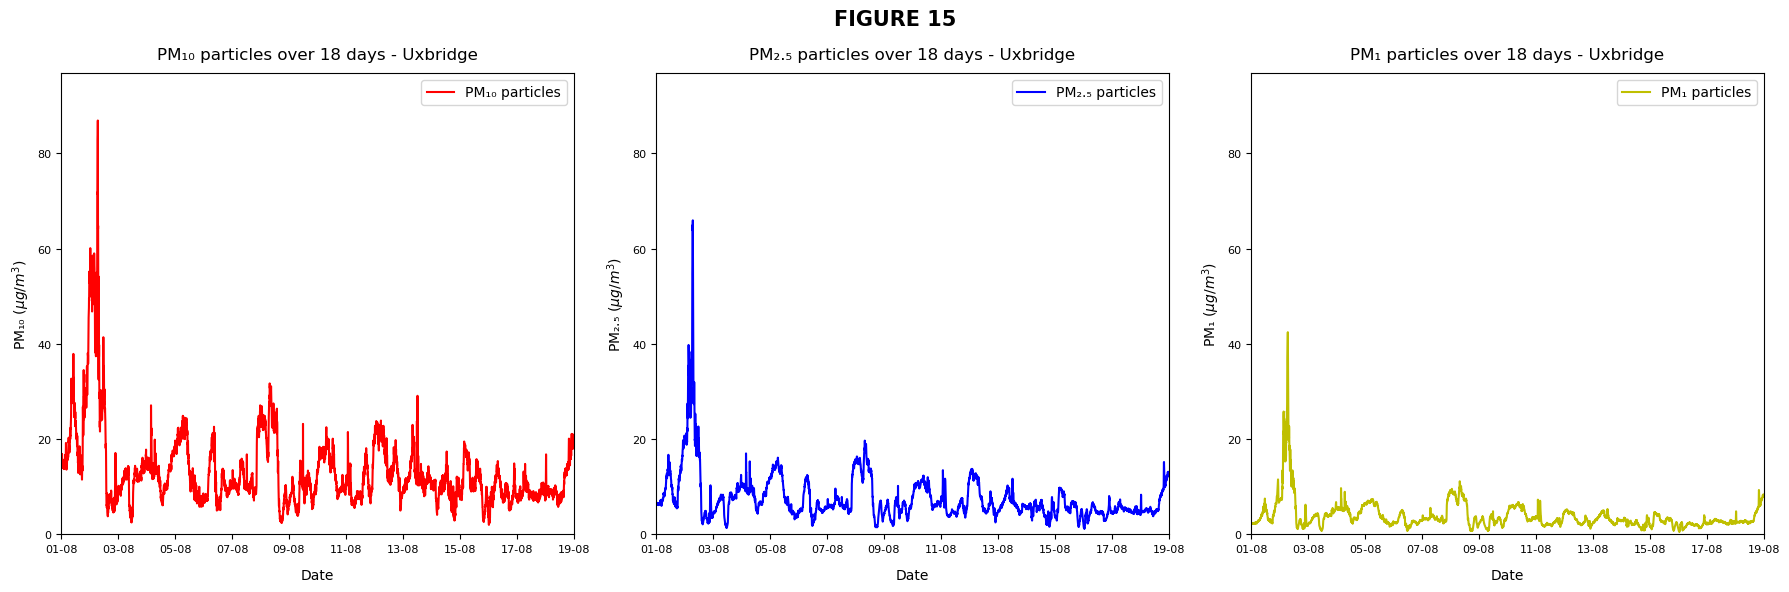

In [36]:
''' PM10 PM5 PM1 over 14 days in one line - Control Site '''

folder_path = '/Users/ahmad/Documents/NERC Internship/Data/Excel/Actual Data/Dust/Control Site'

all_dfs = []

# Loop through all files in the directory
for file_name in os.listdir(folder_path):
    if file_name.endswith('.xlsx'):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_excel(file_path, engine='openpyxl')
        df['Date Time'] = pd.to_datetime(df['Date Time'], dayfirst=True, errors='coerce')
        all_dfs.append(df)

combined_df = pd.concat(all_dfs)

# Drop rows with invalid dates and remove duplicates
combined_df = combined_df.dropna(subset=['Date Time'])
combined_df = combined_df.drop_duplicates(subset=['Date Time'])

combined_df = combined_df.sort_values(by='Date Time')

# Create a figure with three subplots side by side
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot PM10
axs[0].plot(combined_df['Date Time'], combined_df['PM10 particles (ug/m^3)'], label='PM₁₀ particles', color="r")
axs[0].set_title('PM₁₀ particles over 18 days - Uxbridge', fontsize=12, pad=10)
axs[0].set_xlabel('Date', fontsize=10, labelpad=10)
axs[0].set_ylabel('PM₁₀ ($μg/m^{3}$)', fontsize=10)
axs[0].legend(fontsize=10)
axs[0].tick_params(axis='both', which='major', labelsize=8)
axs[0].set_xlim(combined_df['Date Time'].min(), combined_df['Date Time'].min() + pd.Timedelta(days=18)) # change days to whatever time period needed
axs[0].set_ylim(0, combined_df['PM10 particles (ug/m^3)'].max() + 10)
axs[0].xaxis.set_major_locator(mdates.DayLocator(interval=2))
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

# Plot PM2.5
axs[1].plot(combined_df['Date Time'], combined_df['PM2.5 particles (ug/m^3)'], label='PM₂.₅ particles', color="b")
axs[1].set_title('PM₂.₅ particles over 18 days - Uxbridge', fontsize=12, pad=10)
axs[1].set_xlabel('Date', fontsize=10, labelpad=10)
axs[1].set_ylabel('PM₂.₅ ($μg/m^{3}$)', fontsize=10)
axs[1].legend(fontsize=10)
axs[1].tick_params(axis='both', which='major', labelsize=8)
axs[1].set_xlim(combined_df['Date Time'].min(), combined_df['Date Time'].min() + pd.Timedelta(days=18)) # change days to whatever time period needed
axs[1].set_ylim(0, combined_df['PM10 particles (ug/m^3)'].max() + 10)
axs[1].xaxis.set_major_locator(mdates.DayLocator(interval=2))
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

# Plot PM1
axs[2].plot(combined_df['Date Time'], combined_df['PM1 particles (ug/m^3)'], label='PM₁ particles', color="y")
axs[2].set_title('PM₁ particles over 18 days - Uxbridge', fontsize=12, pad=10)
axs[2].set_xlabel('Date', fontsize=10, labelpad=10)
axs[2].set_ylabel('PM₁ ($μg/m^{3}$)', fontsize=10)
axs[2].legend(fontsize=10)
axs[2].tick_params(axis='both', which='major', labelsize=8)
axs[2].set_xlim(combined_df['Date Time'].min(), combined_df['Date Time'].min() + pd.Timedelta(days=18)) # change days to whatever time period needed
axs[2].set_ylim(0, combined_df['PM10 particles (ug/m^3)'].max() + 10)
axs[2].xaxis.set_major_locator(mdates.DayLocator(interval=2))
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

plt.suptitle('FIGURE 15', fontweight='bold', fontsize=15,x=0.5, y=0.98)

plt.tight_layout()

plt.savefig('/Users/ahmad/Pictures/NERC/Figures/Figure_15', dpi=300)

plt.show()

# Fig 16: PM10 PM2.5 PM1 day by day over 14 days - Control Site

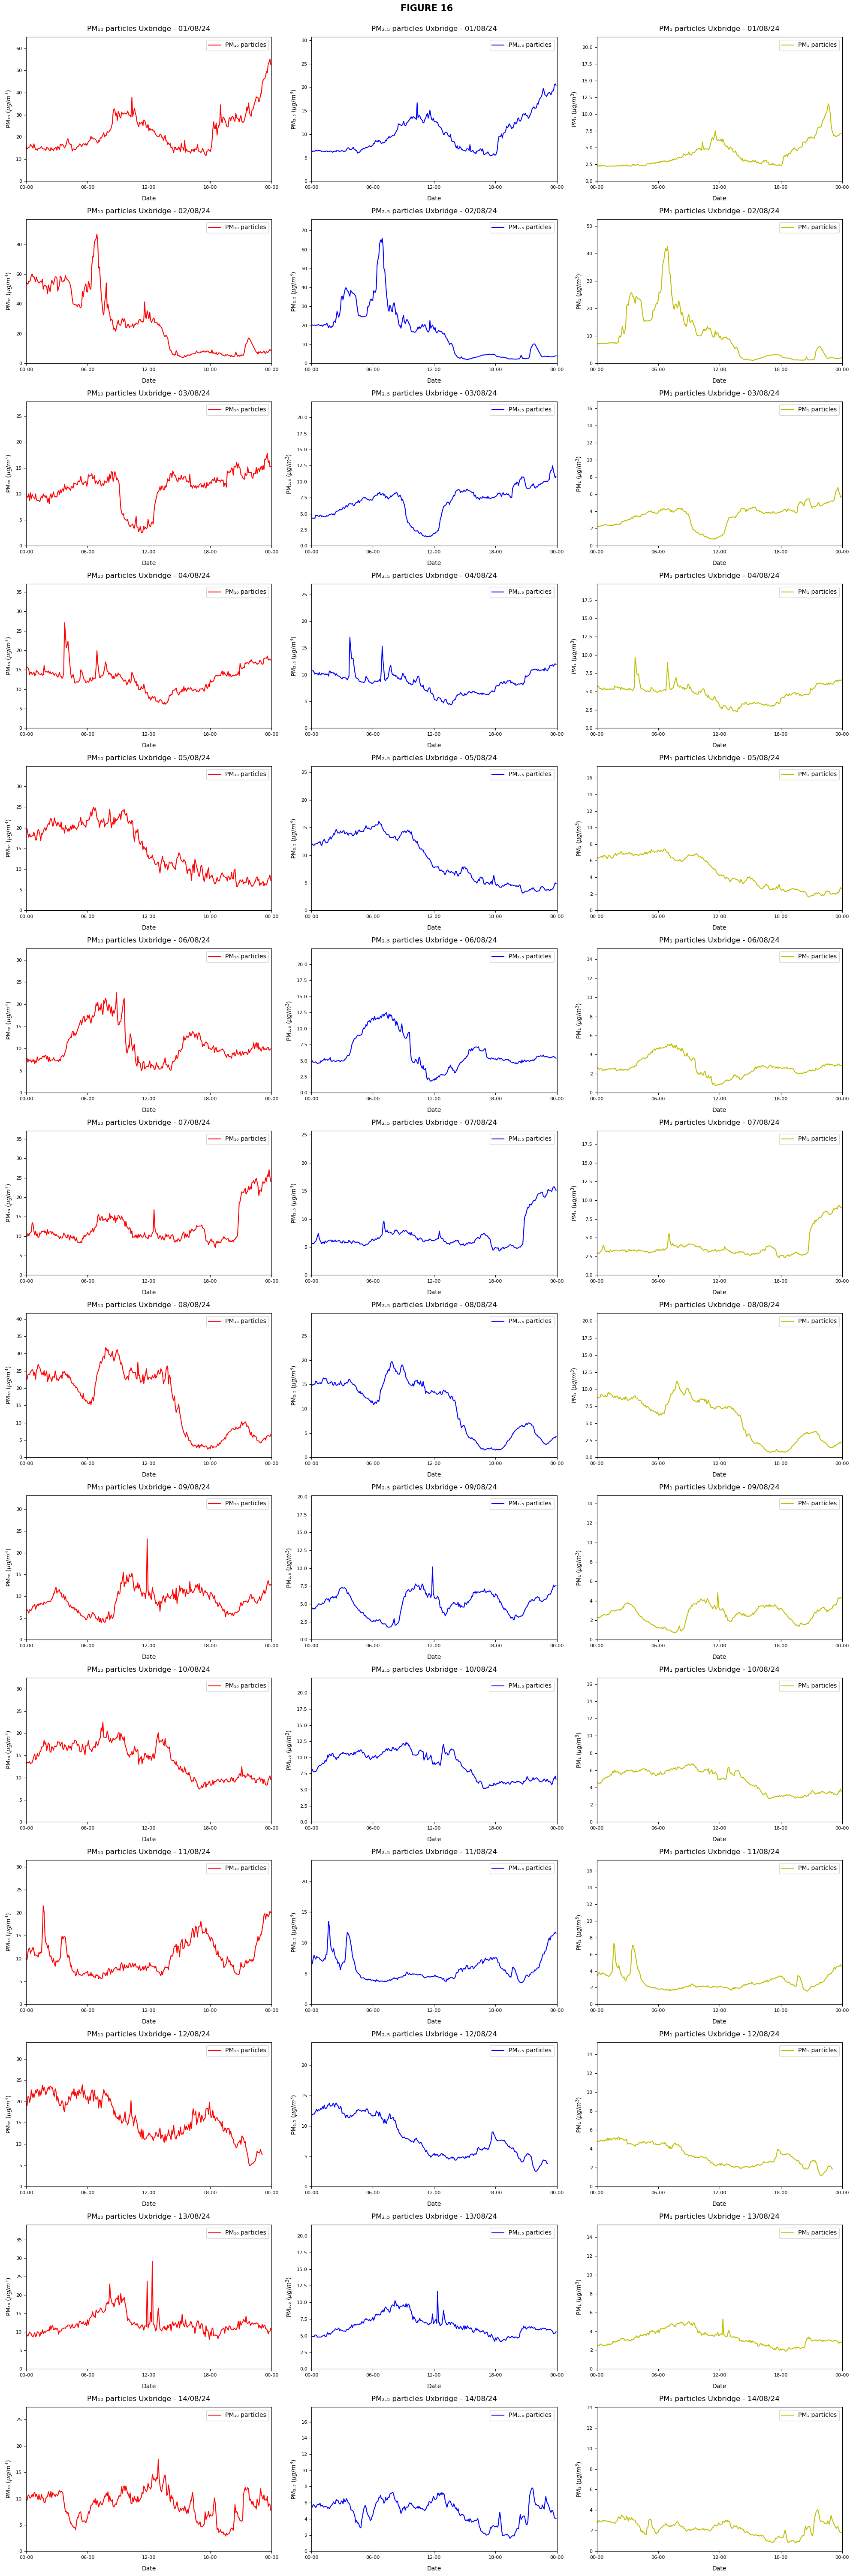

In [37]:
''' PM10 PM2.5 PM1 day by day over 14 days - Control Site '''

folder_path = '/Users/ahmad/Documents/NERC Internship/Data/Excel/Actual Data/Dust/Control Site'

all_dfs = []

# Loop through all files in the directory
for file_name in os.listdir(folder_path):
    if file_name.endswith('.xlsx'):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_excel(file_path, engine='openpyxl')
        df['Date Time'] = pd.to_datetime(df['Date Time'], dayfirst=True, errors='coerce')
        all_dfs.append(df)

combined_df = pd.concat(all_dfs)

# Drop rows with invalid dates and remove duplicates
combined_df = combined_df.dropna(subset=['Date Time'])
combined_df = combined_df.drop_duplicates(subset=['Date Time'])
combined_df = combined_df.sort_values(by='Date Time')

fig, axs = plt.subplots(14, 3, figsize=(20, 60))

# Loop through each day and create plots
for i in range(14):
    start_time = combined_df['Date Time'].min() + pd.Timedelta(days=i)
    end_time = start_time + pd.Timedelta(days=1)
    day_df = combined_df[(combined_df['Date Time'] >= start_time) & (combined_df['Date Time'] < end_time)]

    if not day_df.empty:
        date_str = start_time.strftime('%d/%m/%y')

        # Plot PM10
        axs[i, 0].plot(day_df['Date Time'], day_df['PM10 particles (ug/m^3)'], label='PM₁₀ particles', color="r")
        axs[i, 0].set_title(f'PM₁₀ particles Uxbridge - {date_str}', fontsize=12, pad=10)
        axs[i, 0].set_xlabel('Date', fontsize=10, labelpad=10)
        axs[i, 0].set_ylabel('PM₁₀ ($μg/m^{3}$)', fontsize=10)
        axs[i, 0].legend(fontsize=10)
        axs[i, 0].tick_params(axis='both', which='major', labelsize=8)
        axs[i, 0].set_xlim(start_time, end_time)
        axs[i, 0].set_ylim(0, day_df['PM10 particles (ug/m^3)'].max() + 10)
        axs[i, 0].xaxis.set_major_locator(mdates.HourLocator(interval=6))
        axs[i, 0].xaxis.set_major_formatter(mdates.DateFormatter('%H-%M'))

        # Plot PM2.5
        axs[i, 1].plot(day_df['Date Time'], day_df['PM2.5 particles (ug/m^3)'], label='PM₂.₅ particles', color="b")
        axs[i, 1].set_title(f'PM₂.₅ particles Uxbridge - {date_str}', fontsize=12, pad=10)
        axs[i, 1].set_xlabel('Date', fontsize=10, labelpad=10)
        axs[i, 1].set_ylabel('PM₂.₅ ($μg/m^{3}$)', fontsize=10)
        axs[i, 1].legend(fontsize=10)
        axs[i, 1].tick_params(axis='both', which='major', labelsize=8)
        axs[i, 1].set_xlim(start_time, end_time)
        axs[i, 1].set_ylim(0, day_df['PM2.5 particles (ug/m^3)'].max() + 10)
        axs[i, 1].xaxis.set_major_locator(mdates.HourLocator(interval=6))
        axs[i, 1].xaxis.set_major_formatter(mdates.DateFormatter('%H-%M'))

        # Plot PM1
        axs[i, 2].plot(day_df['Date Time'], day_df['PM1 particles (ug/m^3)'], label='PM₁ particles', color="y")
        axs[i, 2].set_title(f'PM₁ particles Uxbridge - {date_str}', fontsize=12, pad=10)
        axs[i, 2].set_xlabel('Date', fontsize=10, labelpad=10)
        axs[i, 2].set_ylabel('PM₁ ($μg/m^{3}$)', fontsize=10)
        axs[i, 2].legend(fontsize=10)
        axs[i, 2].tick_params(axis='both', which='major', labelsize=8)
        axs[i, 2].set_xlim(start_time, end_time)
        axs[i, 2].set_ylim(0, day_df['PM1 particles (ug/m^3)'].max() + 10)
        axs[i, 2].xaxis.set_major_locator(mdates.HourLocator(interval=6))
        axs[i, 2].xaxis.set_major_formatter(mdates.DateFormatter('%H-%M'))
        
plt.suptitle('FIGURE 16', fontweight='bold', fontsize=15,x=0.5, y=1)

plt.tight_layout()

plt.savefig('/Users/ahmad/Pictures/NERC/Figures/Figure_16', dpi=300)

plt.show()

# Fig 17: PM10 PM2.5 PM1 day by day over 14 days - Test Site

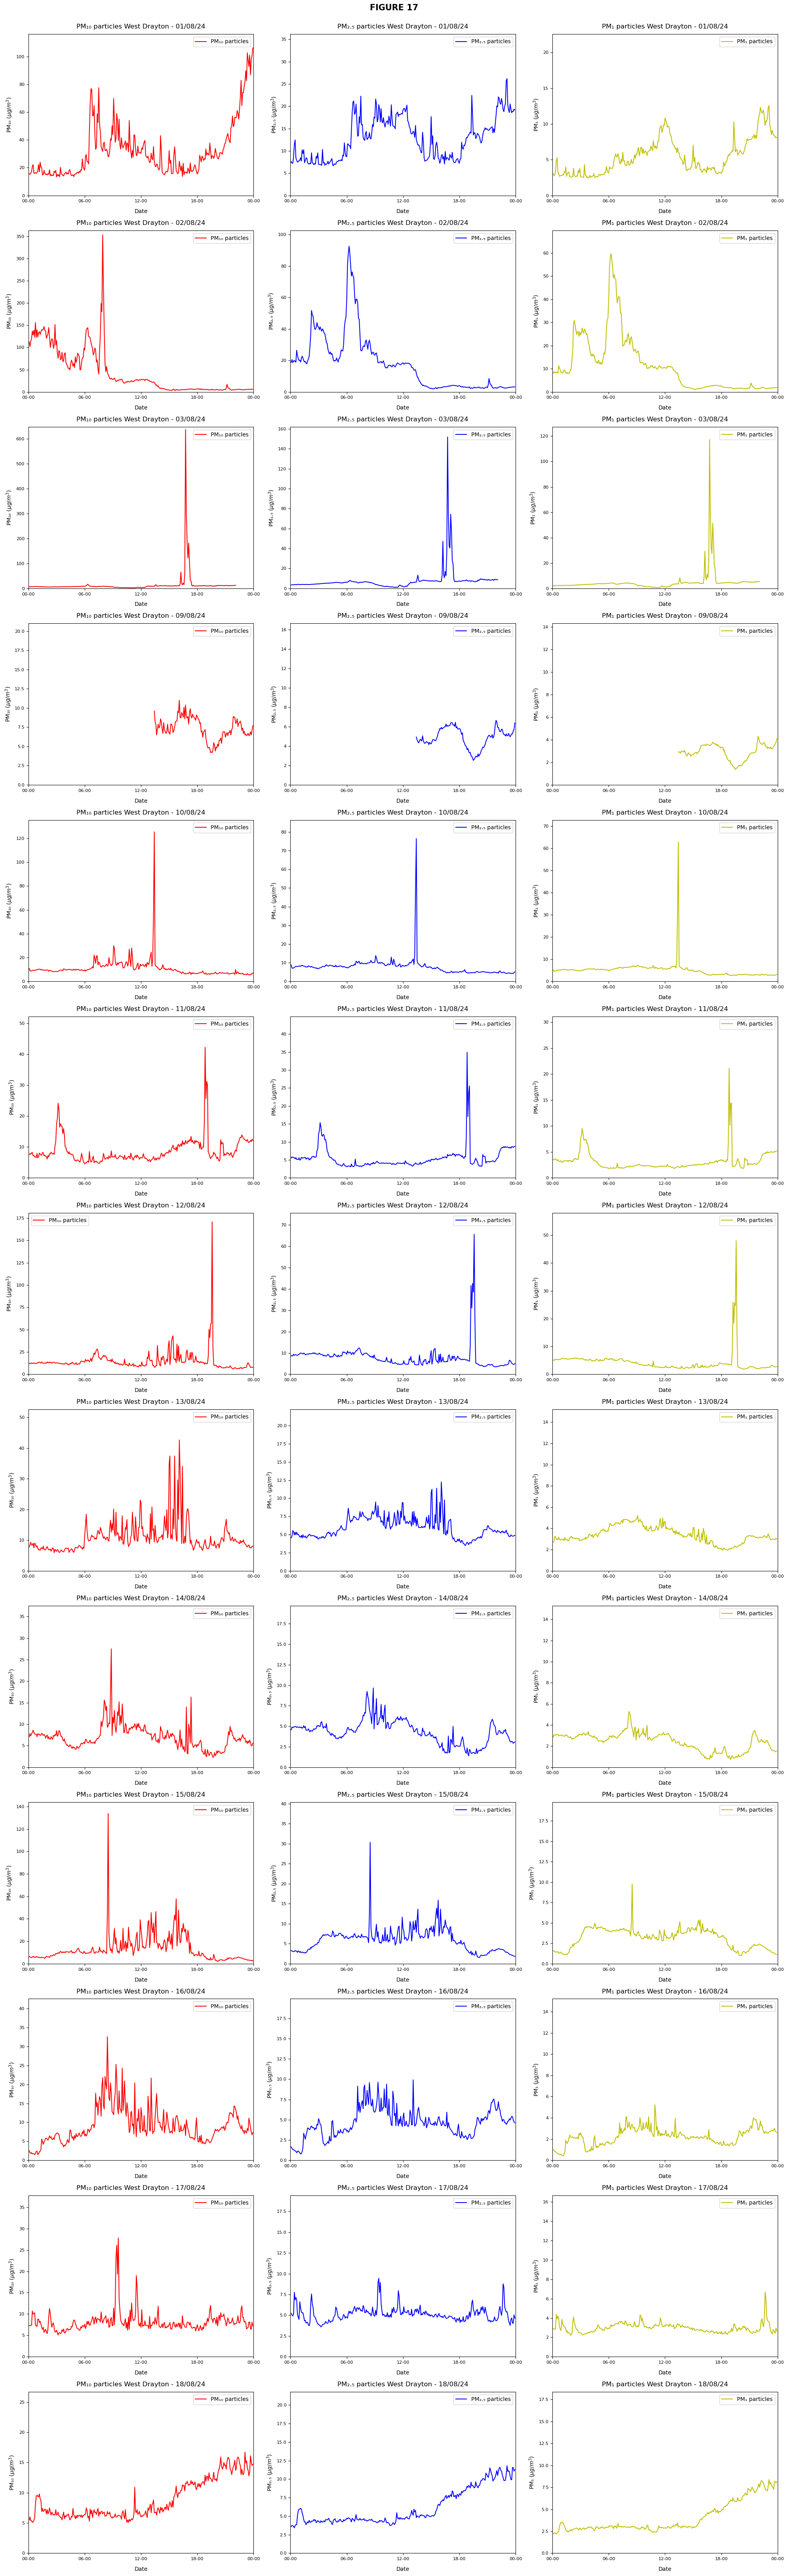

In [38]:
''' PM10 PM2.5 PM1 day by day over 14 days - Test Site '''

folder_path = '/Users/ahmad/Documents/NERC Internship/Data/Excel/Actual Data/Dust/Test Site'

all_dfs = []

# Loop through all files in the directory
for file_name in os.listdir(folder_path):
    if file_name.endswith('.xlsx'):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_excel(file_path, engine='openpyxl')
        df['Date Time'] = pd.to_datetime(df['Date Time'], dayfirst=True, errors='coerce')
        all_dfs.append(df)

combined_df = pd.concat(all_dfs)

# Drop rows with invalid dates and remove duplicates
combined_df = combined_df.dropna(subset=['Date Time'])
combined_df = combined_df.drop_duplicates(subset=['Date Time'])
combined_df = combined_df.sort_values(by='Date Time')

# Determine the date range to plot
start_date = combined_df['Date Time'].min()
end_date = combined_df['Date Time'].max()

# List to hold the dates with data
dates_with_data = []

# Identify days with data
for i in range((end_date - start_date).days + 1):
    current_date = start_date + pd.Timedelta(days=i)
    next_date = current_date + pd.Timedelta(days=1)
    
    # Filter data for the current day
    day_df = combined_df[(combined_df['Date Time'] >= current_date) & (combined_df['Date Time'] < next_date)]

    if not day_df.empty:
        dates_with_data.append(current_date)

# Prepare figure for plots based on the number of days with data
num_days = len(dates_with_data)
num_rows = (num_days * 3 + 2) // 3
fig, axs = plt.subplots(num_rows, 3, figsize=(20, 5 * num_rows), squeeze=False)

# Flatten the array of axes
axs = axs.flatten()

# Loop through each day with data and create plots
for idx, date in enumerate(dates_with_data):
    start_time = date
    end_time = start_time + pd.Timedelta(days=1)
    
    # Filter data for the current day
    day_df = combined_df[(combined_df['Date Time'] >= start_time) & (combined_df['Date Time'] < end_time)]

    date_str = start_time.strftime('%d/%m/%y')
    
    # Plot PM10
    axs[3 * idx].plot(day_df['Date Time'], day_df['PM10 particles (ug/m^3)'], label='PM₁₀ particles', color="r")
    axs[3 * idx].set_title(f'PM₁₀ particles West Drayton - {date_str}', fontsize=12, pad=10)
    axs[3 * idx].set_xlabel('Date', fontsize=10, labelpad=10)
    axs[3 * idx].set_ylabel('PM₁₀ ($μg/m^{3}$)', fontsize=10)
    axs[3 * idx].legend(fontsize=10)
    axs[3 * idx].tick_params(axis='both', which='major', labelsize=8)
    axs[3 * idx].set_xlim(start_time, end_time)
    axs[3 * idx].set_ylim(0, day_df['PM10 particles (ug/m^3)'].max() + 10)
    axs[3 * idx].xaxis.set_major_locator(mdates.HourLocator(interval=6))
    axs[3 * idx].xaxis.set_major_formatter(mdates.DateFormatter('%H-%M'))

    # Plot PM2.5
    axs[3 * idx + 1].plot(day_df['Date Time'], day_df['PM2.5 particles (ug/m^3)'], label='PM₂.₅ particles', color="b")
    axs[3 * idx + 1].set_title(f'PM₂.₅ particles West Drayton - {date_str}', fontsize=12, pad=10)
    axs[3 * idx + 1].set_xlabel('Date', fontsize=10, labelpad=10)
    axs[3 * idx + 1].set_ylabel('PM₂.₅ ($μg/m^{3}$)', fontsize=10)
    axs[3 * idx + 1].legend(fontsize=10)
    axs[3 * idx + 1].tick_params(axis='both', which='major', labelsize=8)
    axs[3 * idx + 1].set_xlim(start_time, end_time)
    axs[3 * idx + 1].set_ylim(0, day_df['PM2.5 particles (ug/m^3)'].max() + 10)
    axs[3 * idx + 1].xaxis.set_major_locator(mdates.HourLocator(interval=6))
    axs[3 * idx + 1].xaxis.set_major_formatter(mdates.DateFormatter('%H-%M'))

    # Plot PM1
    axs[3 * idx + 2].plot(day_df['Date Time'], day_df['PM1 particles (ug/m^3)'], label='PM₁ particles', color="y")
    axs[3 * idx + 2].set_title(f'PM₁ particles West Drayton - {date_str}', fontsize=12, pad=10)
    axs[3 * idx + 2].set_xlabel('Date', fontsize=10, labelpad=10)
    axs[3 * idx + 2].set_ylabel('PM₁ ($μg/m^{3}$)', fontsize=10)
    axs[3 * idx + 2].legend(fontsize=10)
    axs[3 * idx + 2].tick_params(axis='both', which='major', labelsize=8)
    axs[3 * idx + 2].set_xlim(start_time, end_time)
    axs[3 * idx + 2].set_ylim(0, day_df['PM1 particles (ug/m^3)'].max() + 10)
    axs[3 * idx + 2].xaxis.set_major_locator(mdates.HourLocator(interval=6))
    axs[3 * idx + 2].xaxis.set_major_formatter(mdates.DateFormatter('%H-%M'))

# Remove unused subplots
for idx in range(num_days * 3, len(axs)):
    fig.delaxes(axs[idx])

plt.suptitle('FIGURE 17', fontweight='bold', fontsize=15, x=0.5, y=1)
plt.tight_layout()

# Save the figure
plt.savefig('/Users/ahmad/Pictures/NERC/Figures/Figure_17', dpi=300)

plt.show()

# Fig 18: PM10 PM2.5 PM1 Control vs Test Site over 14 days

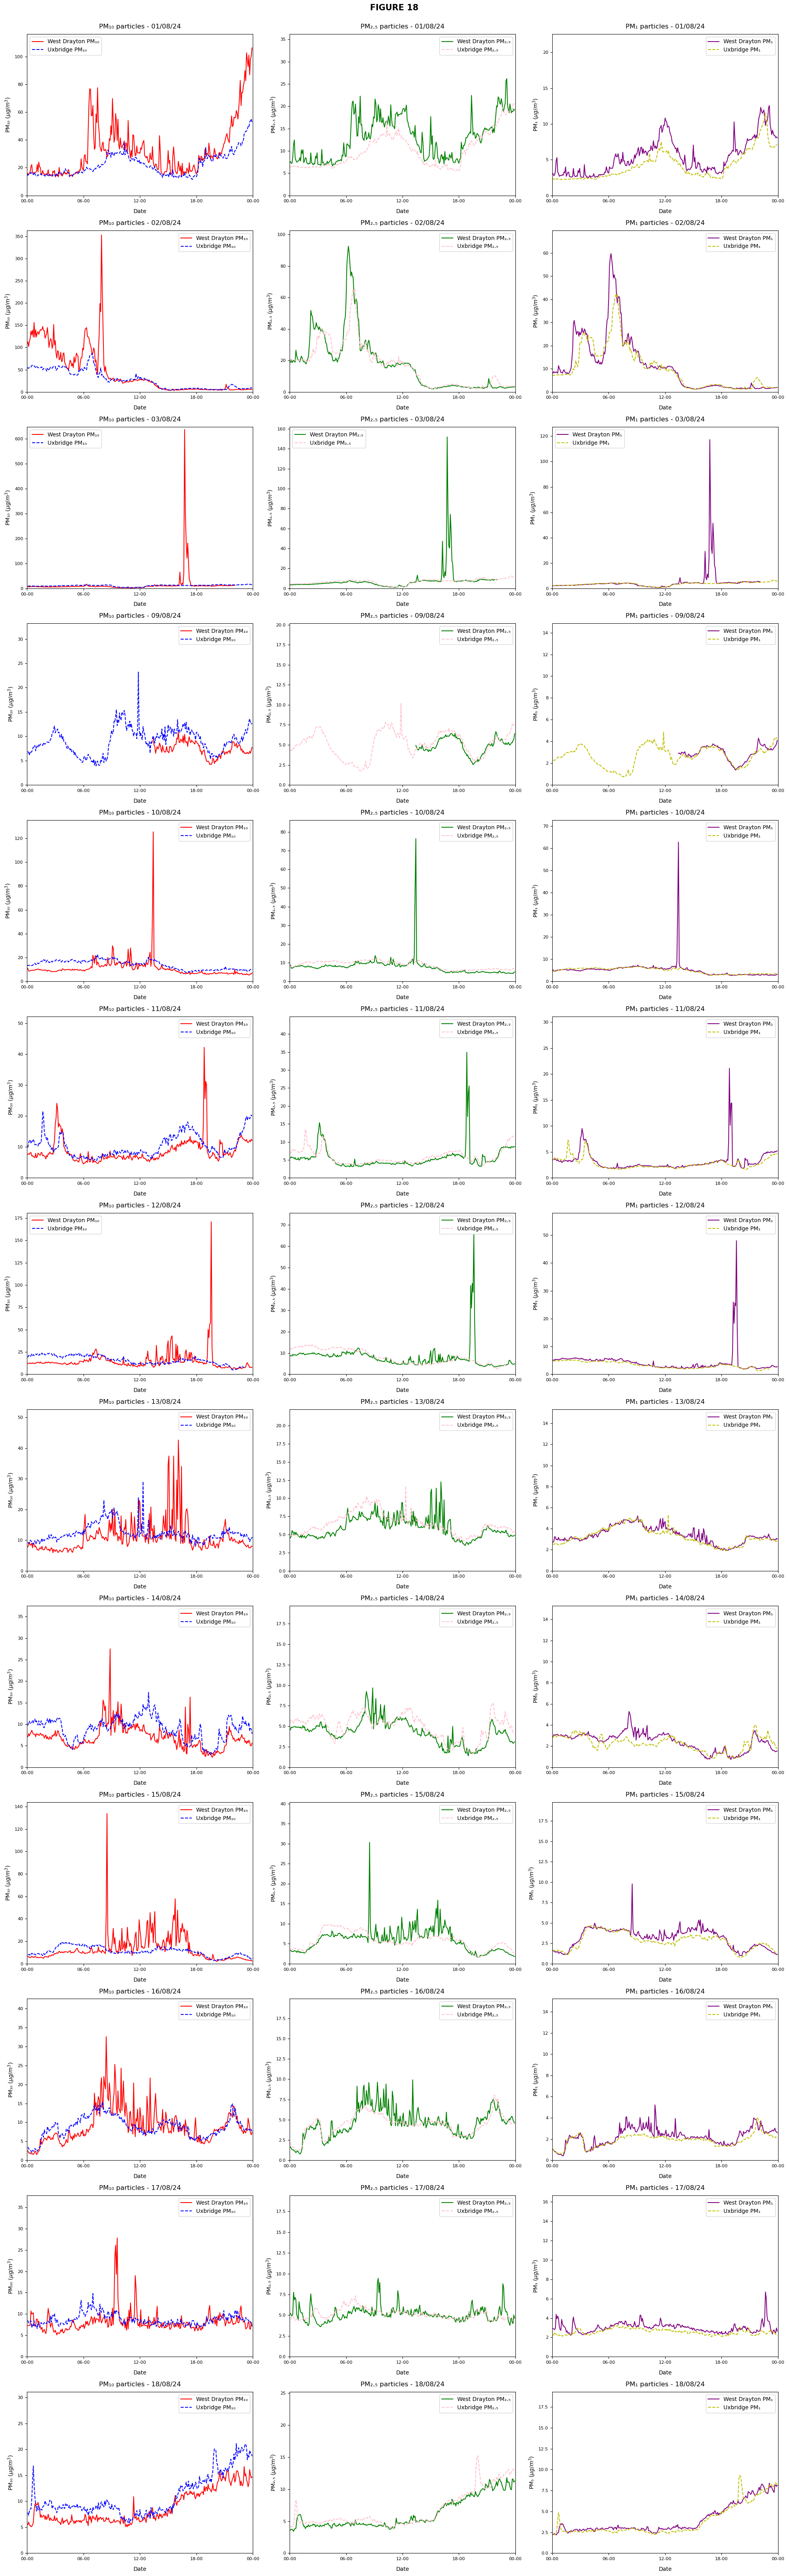

In [39]:
''' PM10 PM2.5 PM1 Control vs Test Site over 14 days '''

test_site_dir = '/Users/ahmad/Documents/NERC Internship/Data/Excel/Actual Data/Dust/Test Site'
control_site_dir = '/Users/ahmad/Documents/NERC Internship/Data/Excel/Actual Data/Dust/Control Site'

# Read files and put them into a single dataframe
def read_data_from_directory(directory):
    dfs = []
    for file_name in os.listdir(directory):
        if file_name.endswith('.xlsx'):
            file_path = os.path.join(directory, file_name)
            df = pd.read_excel(file_path, engine='openpyxl')
            df['Date Time'] = pd.to_datetime(df['Date Time'], dayfirst=True, errors='coerce')
            dfs.append(df)
    combined_df = pd.concat(dfs)
    combined_df = combined_df.dropna(subset=['Date Time'])
    combined_df = combined_df.drop_duplicates(subset=['Date Time'])
    return combined_df.sort_values(by='Date Time')

# Read data from both directories
test_site_df = read_data_from_directory(test_site_dir)
control_site_df = read_data_from_directory(control_site_dir)

# Determine the date range to plot
start_date = min(test_site_df['Date Time'].min(), control_site_df['Date Time'].min())
end_date = max(test_site_df['Date Time'].max(), control_site_df['Date Time'].max())

# List to hold the dates with data
dates_with_data = []

# Identify days with data
for i in range((end_date - start_date).days + 1):
    current_date = start_date + pd.Timedelta(days=i)
    next_date = current_date + pd.Timedelta(days=1)
    
    # Filter data for the current day
    test_day_df = test_site_df[(test_site_df['Date Time'] >= current_date) & (test_site_df['Date Time'] < next_date)]
    control_day_df = control_site_df[(control_site_df['Date Time'] >= current_date) & (control_site_df['Date Time'] < next_date)]

    if not test_day_df.empty and not control_day_df.empty:
        dates_with_data.append(current_date)

# Prepare figure for plots based on the number of days with data
num_days = len(dates_with_data)
num_rows = (num_days * 3 + 2) // 3 
fig, axs = plt.subplots(num_rows, 3, figsize=(20, 5 * num_rows), squeeze=False)

# Flatten the array of axes
axs = axs.flatten()

# Loop through each day with data and create plots
for idx, date in enumerate(dates_with_data):
    start_time = date
    end_time = start_time + pd.Timedelta(days=1)
    
    # Filter data for the current day
    test_day_df = test_site_df[(test_site_df['Date Time'] >= start_time) & (test_site_df['Date Time'] < end_time)]
    control_day_df = control_site_df[(control_site_df['Date Time'] >= start_time) & (control_site_df['Date Time'] < end_time)]

    date_str = start_time.strftime('%d/%m/%y')
    
    # Plot PM10
    axs[3 * idx].plot(test_day_df['Date Time'], test_day_df['PM10 particles (ug/m^3)'], label='West Drayton PM₁₀', color="r")
    axs[3 * idx].plot(control_day_df['Date Time'], control_day_df['PM10 particles (ug/m^3)'], label='Uxbridge PM₁₀', color="b", linestyle='--')
    axs[3 * idx].set_title(f'PM₁₀ particles - {date_str}', fontsize=12, pad=10)
    axs[3 * idx].set_xlabel('Date', fontsize=10, labelpad=10)
    axs[3 * idx].set_ylabel('PM₁₀ ($μg/m^{3}$)', fontsize=10)
    axs[3 * idx].legend(fontsize=10)
    axs[3 * idx].tick_params(axis='both', which='major', labelsize=8)
    axs[3 * idx].set_xlim(start_time, end_time)
    axs[3 * idx].set_ylim(0, max(test_day_df['PM10 particles (ug/m^3)'].max(), control_day_df['PM10 particles (ug/m^3)'].max()) + 10)
    axs[3 * idx].xaxis.set_major_locator(mdates.HourLocator(interval=6))
    axs[3 * idx].xaxis.set_major_formatter(mdates.DateFormatter('%H-%M'))

    # Plot PM2.5
    axs[3 * idx + 1].plot(test_day_df['Date Time'], test_day_df['PM2.5 particles (ug/m^3)'], label='West Drayton PM₂.₅', color="g")
    axs[3 * idx + 1].plot(control_day_df['Date Time'], control_day_df['PM2.5 particles (ug/m^3)'], label='Uxbridge PM₂.₅', color="pink", linestyle='--')
    axs[3 * idx + 1].set_title(f'PM₂.₅ particles - {date_str}', fontsize=12, pad=10)
    axs[3 * idx + 1].set_xlabel('Date', fontsize=10, labelpad=10)
    axs[3 * idx + 1].set_ylabel('PM₂.₅ ($μg/m^{3}$)', fontsize=10)
    axs[3 * idx + 1].legend(fontsize=10)
    axs[3 * idx + 1].tick_params(axis='both', which='major', labelsize=8)
    axs[3 * idx + 1].set_xlim(start_time, end_time)
    axs[3 * idx + 1].set_ylim(0, max(test_day_df['PM2.5 particles (ug/m^3)'].max(), control_day_df['PM2.5 particles (ug/m^3)'].max()) + 10)
    axs[3 * idx + 1].xaxis.set_major_locator(mdates.HourLocator(interval=6))
    axs[3 * idx + 1].xaxis.set_major_formatter(mdates.DateFormatter('%H-%M'))

    # Plot PM1
    axs[3 * idx + 2].plot(test_day_df['Date Time'], test_day_df['PM1 particles (ug/m^3)'], label='West Drayton PM₁', color="purple")
    axs[3 * idx + 2].plot(control_day_df['Date Time'], control_day_df['PM1 particles (ug/m^3)'], label='Uxbridge PM₁', color="y", linestyle='--')
    axs[3 * idx + 2].set_title(f'PM₁ particles - {date_str}', fontsize=12, pad=10)
    axs[3 * idx + 2].set_xlabel('Date', fontsize=10, labelpad=10)
    axs[3 * idx + 2].set_ylabel('PM₁ ($μg/m^{3}$)', fontsize=10)
    axs[3 * idx + 2].legend(fontsize=10)
    axs[3 * idx + 2].tick_params(axis='both', which='major', labelsize=8)
    axs[3 * idx + 2].set_xlim(start_time, end_time)
    axs[3 * idx + 2].set_ylim(0, max(test_day_df['PM1 particles (ug/m^3)'].max(), control_day_df['PM1 particles (ug/m^3)'].max()) + 10)
    axs[3 * idx + 2].xaxis.set_major_locator(mdates.HourLocator(interval=6))
    axs[3 * idx + 2].xaxis.set_major_formatter(mdates.DateFormatter('%H-%M'))

# Remove unused subplots
for idx in range(num_days * 3, len(axs)):
    fig.delaxes(axs[idx])

# Adjust the layout to remove extra space
plt.suptitle('FIGURE 18', fontweight='bold', fontsize=15, x=0.5, y=1)
plt.tight_layout()
#plt.subplots_adjust(top=0.95)  # Adjust top to make room for suptitle

plt.savefig('/Users/ahmad/Pictures/NERC/Figures/Figure_18.png', dpi=300)

plt.show()

# Fig 19: PM10 PM2.5 PM1 Control vs Test Site over 14 days Boxplot

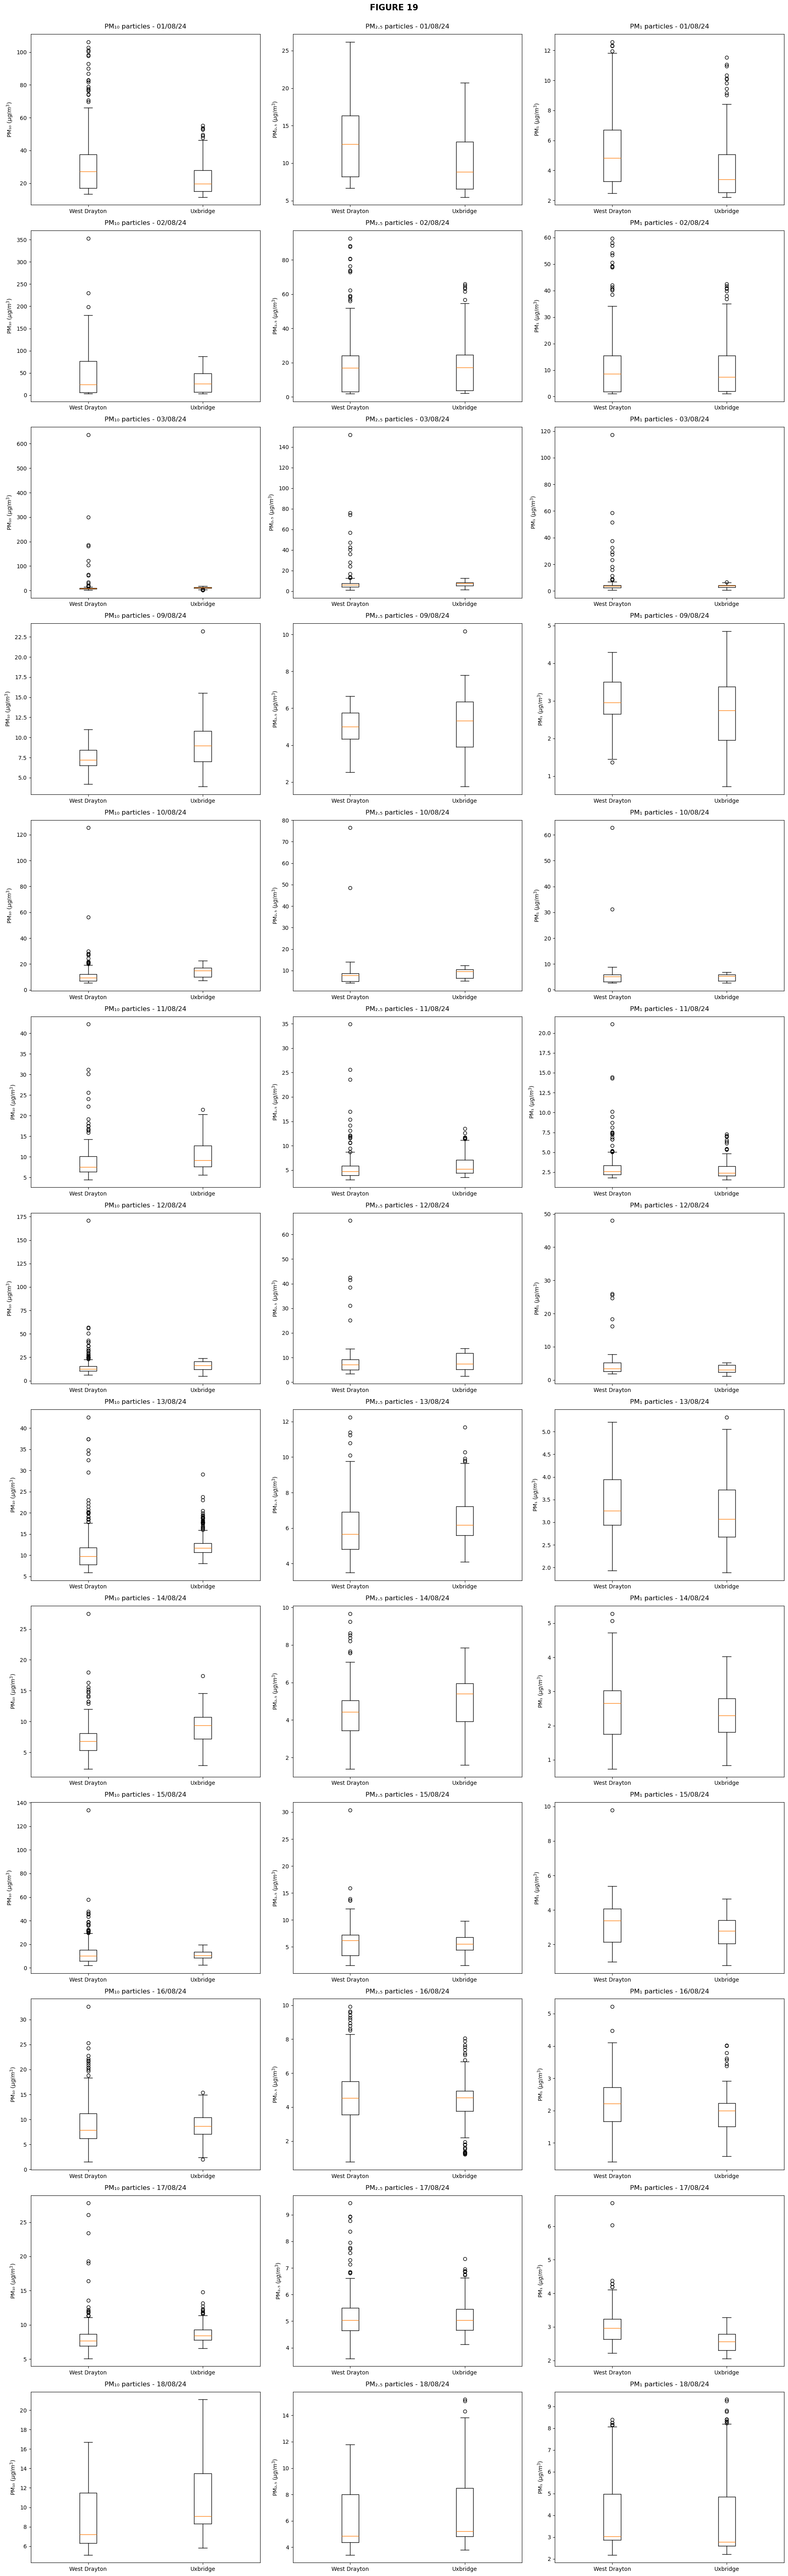

In [40]:
''' PM10 PM2.5 PM1 Control vs Test Site over 14 days Boxplot '''

test_site_dir = '/Users/ahmad/Documents/NERC Internship/Data/Excel/Actual Data/Dust/Test Site'
control_site_dir = '/Users/ahmad/Documents/NERC Internship/Data/Excel/Actual Data/Dust/Control Site'

# Read files and put them into a single dataframe
def read_data_from_directory(directory):
    dfs = []
    for file_name in os.listdir(directory):
        if file_name.endswith('.xlsx'):
            file_path = os.path.join(directory, file_name)
            df = pd.read_excel(file_path, engine='openpyxl')
            df['Date Time'] = pd.to_datetime(df['Date Time'], dayfirst=True, errors='coerce')
            dfs.append(df)
    combined_df = pd.concat(dfs)
    combined_df = combined_df.dropna(subset=['Date Time'])
    combined_df = combined_df.drop_duplicates(subset=['Date Time'])
    return combined_df.sort_values(by='Date Time')

# Read data from both directories
test_site_df = read_data_from_directory(test_site_dir)
control_site_df = read_data_from_directory(control_site_dir)

# Determine the date range to plot
start_date = min(test_site_df['Date Time'].min(), control_site_df['Date Time'].min())
end_date = max(test_site_df['Date Time'].max(), control_site_df['Date Time'].max())

# List to hold the dates with data
dates_with_data = []

# Identify days with data
for i in range((end_date - start_date).days + 1):
    current_date = start_date + pd.Timedelta(days=i)
    next_date = current_date + pd.Timedelta(days=1)
    
    # Filter data for the current day
    test_day_df = test_site_df[(test_site_df['Date Time'] >= current_date) & (test_site_df['Date Time'] < next_date)]
    control_day_df = control_site_df[(control_site_df['Date Time'] >= current_date) & (control_site_df['Date Time'] < next_date)]

    if not test_day_df.empty and not control_day_df.empty:
        dates_with_data.append(current_date)

# Prepare box plots
num_days = len(dates_with_data)
num_rows = (num_days * 3 + 2) // 3 
fig, axs = plt.subplots(num_rows, 3, figsize=(20, 5 * num_rows), squeeze=False)

# Flatten the array of axes
axs = axs.flatten()

# Loop through each day with data and create comparison box plots
for idx, date in enumerate(dates_with_data):
    start_time = date
    end_time = start_time + pd.Timedelta(days=1)
    
    # Filter data for the current day
    test_day_df = test_site_df[(test_site_df['Date Time'] >= start_time) & (test_site_df['Date Time'] < end_time)]
    control_day_df = control_site_df[(control_site_df['Date Time'] >= start_time) & (control_site_df['Date Time'] < end_time)]

    date_str = start_time.strftime('%d/%m/%y')
    
    # Plot PM10 box plots
    axs[3 * idx].boxplot([test_day_df['PM10 particles (ug/m^3)'], control_day_df['PM10 particles (ug/m^3)']],
                        labels=['West Drayton', 'Uxbridge'])
    axs[3 * idx].set_title(f'PM₁₀ particles - {date_str}', fontsize=12, pad=10)
    axs[3 * idx].set_ylabel('PM₁₀ ($μg/m^{3}$)', fontsize=10)

    # Plot PM2.5 box plots
    axs[3 * idx + 1].boxplot([test_day_df['PM2.5 particles (ug/m^3)'], control_day_df['PM2.5 particles (ug/m^3)']],
                            labels=['West Drayton', 'Uxbridge'])
    axs[3 * idx + 1].set_title(f'PM₂.₅ particles - {date_str}', fontsize=12, pad=10)
    axs[3 * idx + 1].set_ylabel('PM₂.₅ ($μg/m^{3}$)', fontsize=10)

    # Plot PM1 box plots
    axs[3 * idx + 2].boxplot([test_day_df['PM1 particles (ug/m^3)'], control_day_df['PM1 particles (ug/m^3)']],
                            labels=['West Drayton', 'Uxbridge'])
    axs[3 * idx + 2].set_title(f'PM₁ particles - {date_str}', fontsize=12, pad=10)
    axs[3 * idx + 2].set_ylabel('PM₁ ($μg/m^{3}$)', fontsize=10)

# Remove unused subplots as goes from 3rd to 9th
for idx in range(num_days * 3, len(axs)):
    fig.delaxes(axs[idx])

plt.suptitle('FIGURE 19', fontweight='bold', fontsize=15, x=0.5, y=1)
plt.tight_layout()

plt.savefig('/Users/ahmad/Pictures/NERC/Figures/Figure_19', dpi=300)

plt.show()

#  Fig 20: Test Site First Week Vs Second Week

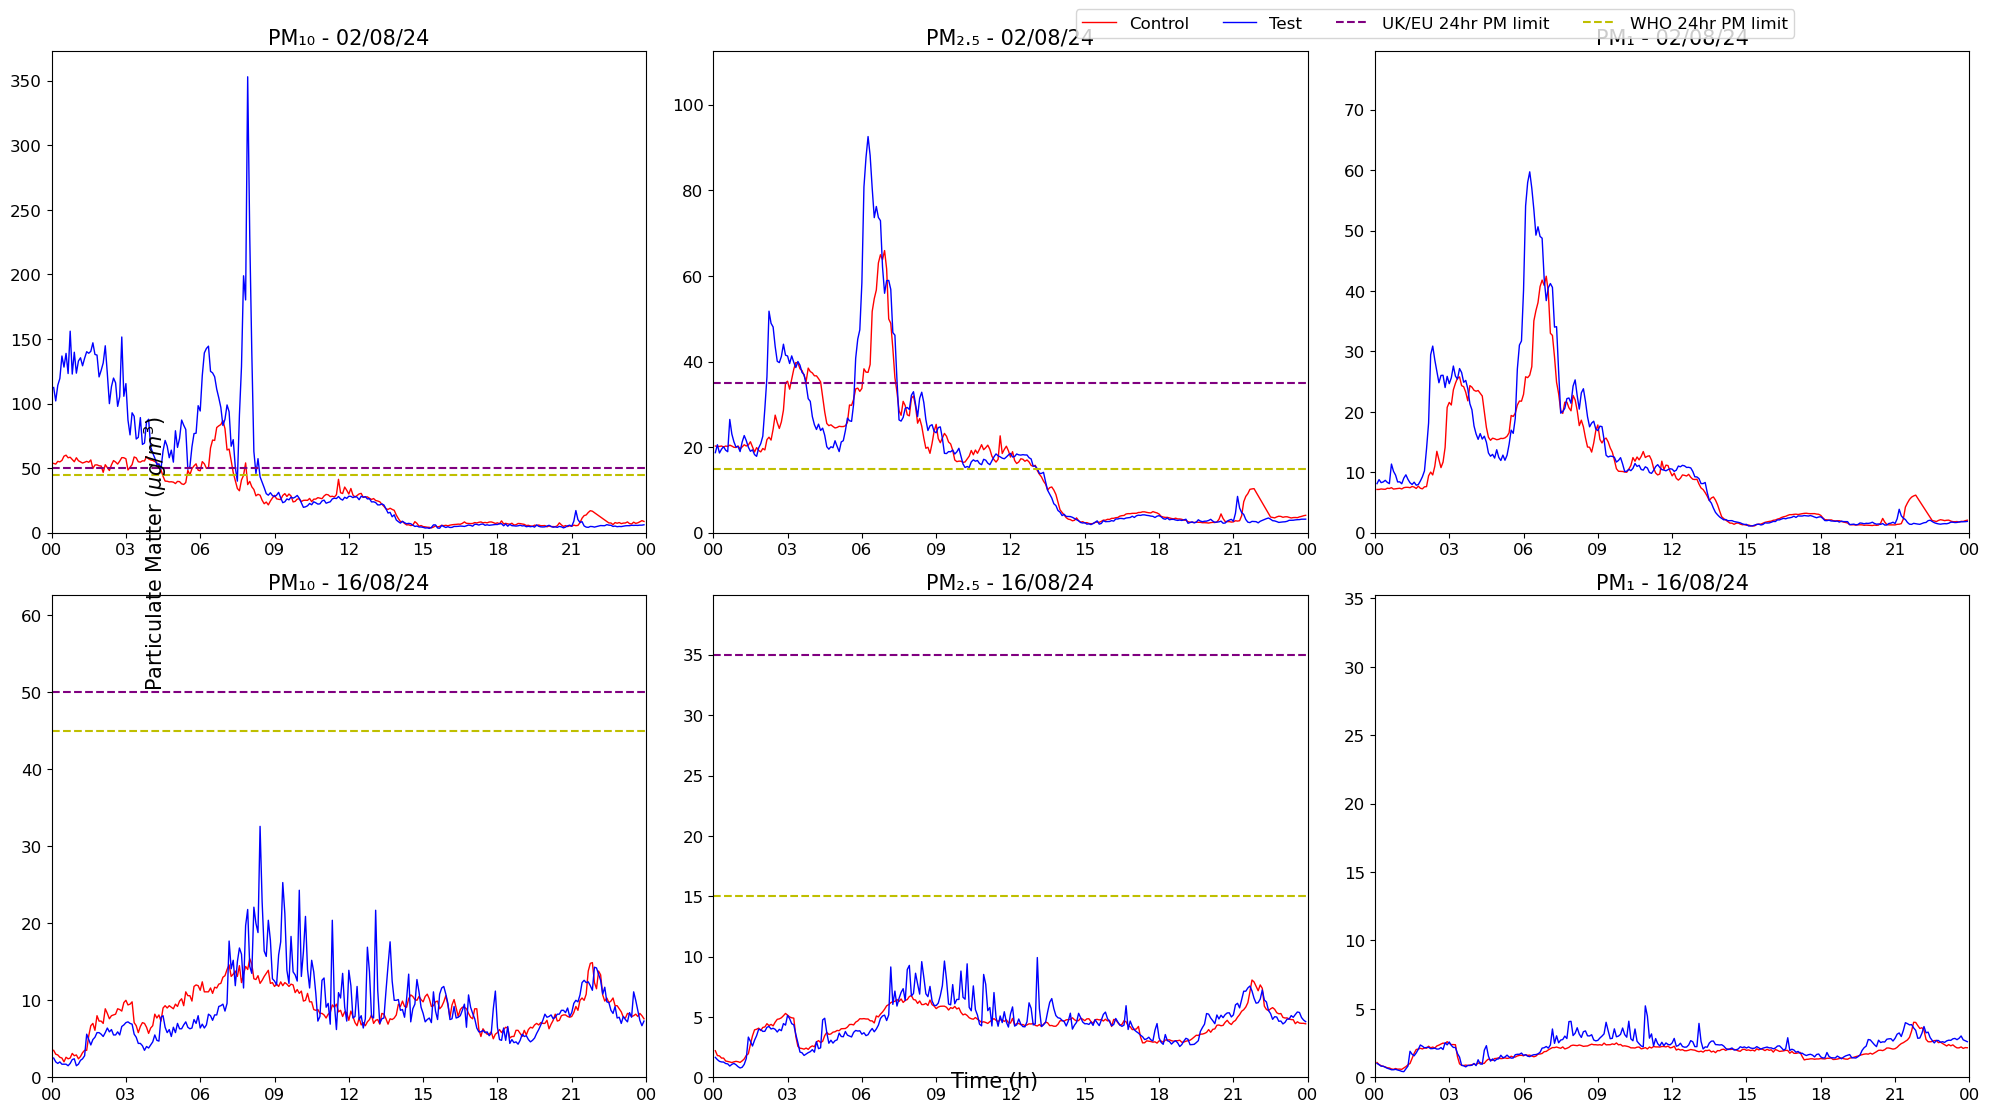

In [46]:
''' Test Site First Week Vs Second Week '''

file_path_1 = '/Users/ahmad/Documents/NERC Internship/Data/Excel/Actual Data/Dust/Control Site/4693_2:8:24_control.xlsx'
df1 = pd.read_excel(file_path_1, engine='openpyxl')

file_path_2 = '/Users/ahmad/Documents/NERC Internship/Data/Excel/Actual Data/Dust/Control Site/4693_16:8:24_control.xlsx'
df2 = pd.read_excel(file_path_2, engine='openpyxl')

file_path_3 = '/Users/ahmad/Documents/NERC Internship/Data/Excel/Actual Data/Dust/Test Site/4573_2:8:24_test.xlsx'
df3 = pd.read_excel(file_path_3, engine='openpyxl')

file_path_4 = '/Users/ahmad/Documents/NERC Internship/Data/Excel/Actual Data/Dust/Test Site/4573_16:8:24_test.xlsx'
df4 = pd.read_excel(file_path_4, engine='openpyxl')

# Converts datetime column into datetime format
df1['Date Time'] = pd.to_datetime(df1['Date Time'], dayfirst=True)
df2['Date Time'] = pd.to_datetime(df2['Date Time'], dayfirst=True)
df3['Date Time'] = pd.to_datetime(df3['Date Time'], dayfirst=True)
df4['Date Time'] = pd.to_datetime(df4['Date Time'], dayfirst=True)

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# PM Types and Titles
pm_types = ['PM10 particles (ug/m^3)', 'PM2.5 particles (ug/m^3)', 'PM1 particles (ug/m^3)']
titles = ['PM₁₀', 'PM₂.₅', 'PM₁']

# For Legend
plot_lines = []
plot_labels = []
uk_line_added = False
who_line_added = False

# Function to set x-axis limits from 00
def set_x_axis_limits(ax, start_time):
    end_time = start_time + pd.Timedelta(days=1)
    ax.set_xlim(start_time, end_time)
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))

# PM Limits
pm10_UK_line = (50, 'UK/EU 24hr LIMIT')
pm10_WHO_line = (45, 'WHO 24hr LIMIT')
pm25_UK_line = (35, 'UK/EU 24hr LIMIT')
pm25_WHO_line = (15, 'WHO 24hr LIMIT')

# Tick control parameters
x_major_tick_freq = [3, 3]  # Frequency for major ticks on the x-axis for both dates
y_major_tick_freqs = [[50, 20, 10], [10, 5, 5]]  # Major tick frequency for the y-axis (each PM type) for both dates

# Plotting for 02/08/24:
for i, pm_type in enumerate(pm_types):
    ax = axes[0, i]
    line1, = ax.plot(df1['Date Time'], df1[pm_type], linewidth=1, color='r', linestyle='-', label='Control')
    line2, = ax.plot(df3['Date Time'], df3[pm_type], linewidth=1, color='b', linestyle='-', label='Test')

    # Add the plot lines and labels to the lists only for the first set of plots (avoid duplicates)
    if i == 0:
        plot_lines.extend([line1, line2])
        plot_labels.extend(['Control', 'Test'])

    ax.set_title(f'{titles[i]} - 02/08/24', fontsize=15, pad=5)
    ax.tick_params(axis='both', which='major', labelsize=12)
    
    start_time = pd.to_datetime(df1['Date Time'].dt.date[0])
    set_x_axis_limits(ax, start_time)

    # Setting x-axis tick frequency
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=x_major_tick_freq[0]))

    # Setting y-axis tick frequency
    ax.yaxis.set_major_locator(plt.MultipleLocator(y_major_tick_freqs[0][i]))
    ax.set_ylim(0, max(df1[pm_type].max(), df3[pm_type].max()) + 20)
    
    # Limit lines
    if titles[i] == 'PM₁₀':
        ax.axhline(y=pm10_UK_line[0], color='purple', linestyle='--')
        ax.axhline(y=pm10_WHO_line[0], color='y', linestyle='--')
    if titles[i] == 'PM₂.₅':
        ax.axhline(y=pm25_UK_line[0], color='purple', linestyle='--')
        ax.axhline(y=pm25_WHO_line[0], color='y', linestyle='--')

# Plotting for 16/08/24:
for i, pm_type in enumerate(pm_types):
    ax = axes[1, i]
    ax.plot(df2['Date Time'], df2[pm_type], linewidth=1, color='r', linestyle='-', label='Control')
    ax.plot(df4['Date Time'], df4[pm_type], linewidth=1, color='b', linestyle='-', label='Test')

    ax.set_title(f'{titles[i]} - 16/08/24', fontsize=15, pad=5)

    ax.tick_params(axis='both', which='major', labelsize=12)

    # x-axis start at 00:00 and end at 23:59 (To ensure x axis starts at 00)
    start_time = pd.to_datetime(df2['Date Time'].dt.date[0])
    set_x_axis_limits(ax, start_time)

    # Setting x-axis tick frequency
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=x_major_tick_freq[1]))
    
    # Setting y-axis tick frequency
    ax.yaxis.set_major_locator(plt.MultipleLocator(y_major_tick_freqs[1][i]))
    ax.set_ylim(0, max(df2[pm_type].max(), df4[pm_type].max()) + 30)
    
    # Limit lines
    if titles[i] == 'PM₁₀':
        ax.axhline(y=pm10_UK_line[0], color='purple', linestyle='--')
        ax.axhline(y=pm10_WHO_line[0], color='y', linestyle='--')
    if titles[i] == 'PM₂.₅':
        ax.axhline(y=pm25_UK_line[0], color='purple', linestyle='--')
        ax.axhline(y=pm25_WHO_line[0], color='y', linestyle='--')

# Add the horizontal lines to the legend only once
if not uk_line_added:
    plot_lines.append(plt.Line2D([], [], color='purple', linestyle='--'))
    plot_labels.append('UK/EU 24hr PM limit')
    uk_line_added = True
if not who_line_added:
    plot_lines.append(plt.Line2D([], [], color='y', linestyle='--'))
    plot_labels.append('WHO 24hr PM limit')
    who_line_added = True

# Axis labels
fig.text(0.08, 0.5, 'Particulate Matter ($μg/m^{3}$)', va='center', ha='center', rotation='vertical', fontsize=15)
fig.text(0.5, 0.06, 'Time (h)', va='center', ha='center', fontsize=15)

# Common legend
fig.legend(plot_lines, plot_labels, loc='upper center', ncol=10, fontsize=12, bbox_to_anchor=(0.72, 0.96))  # Adjust for export or Jupyter

# Save and show the figure
plt.savefig('/Users/ahmad/Pictures/NERC/Figures/Figure_20', dpi=300)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Fig 21: Test Site First Week Vs Second Week Boxplot

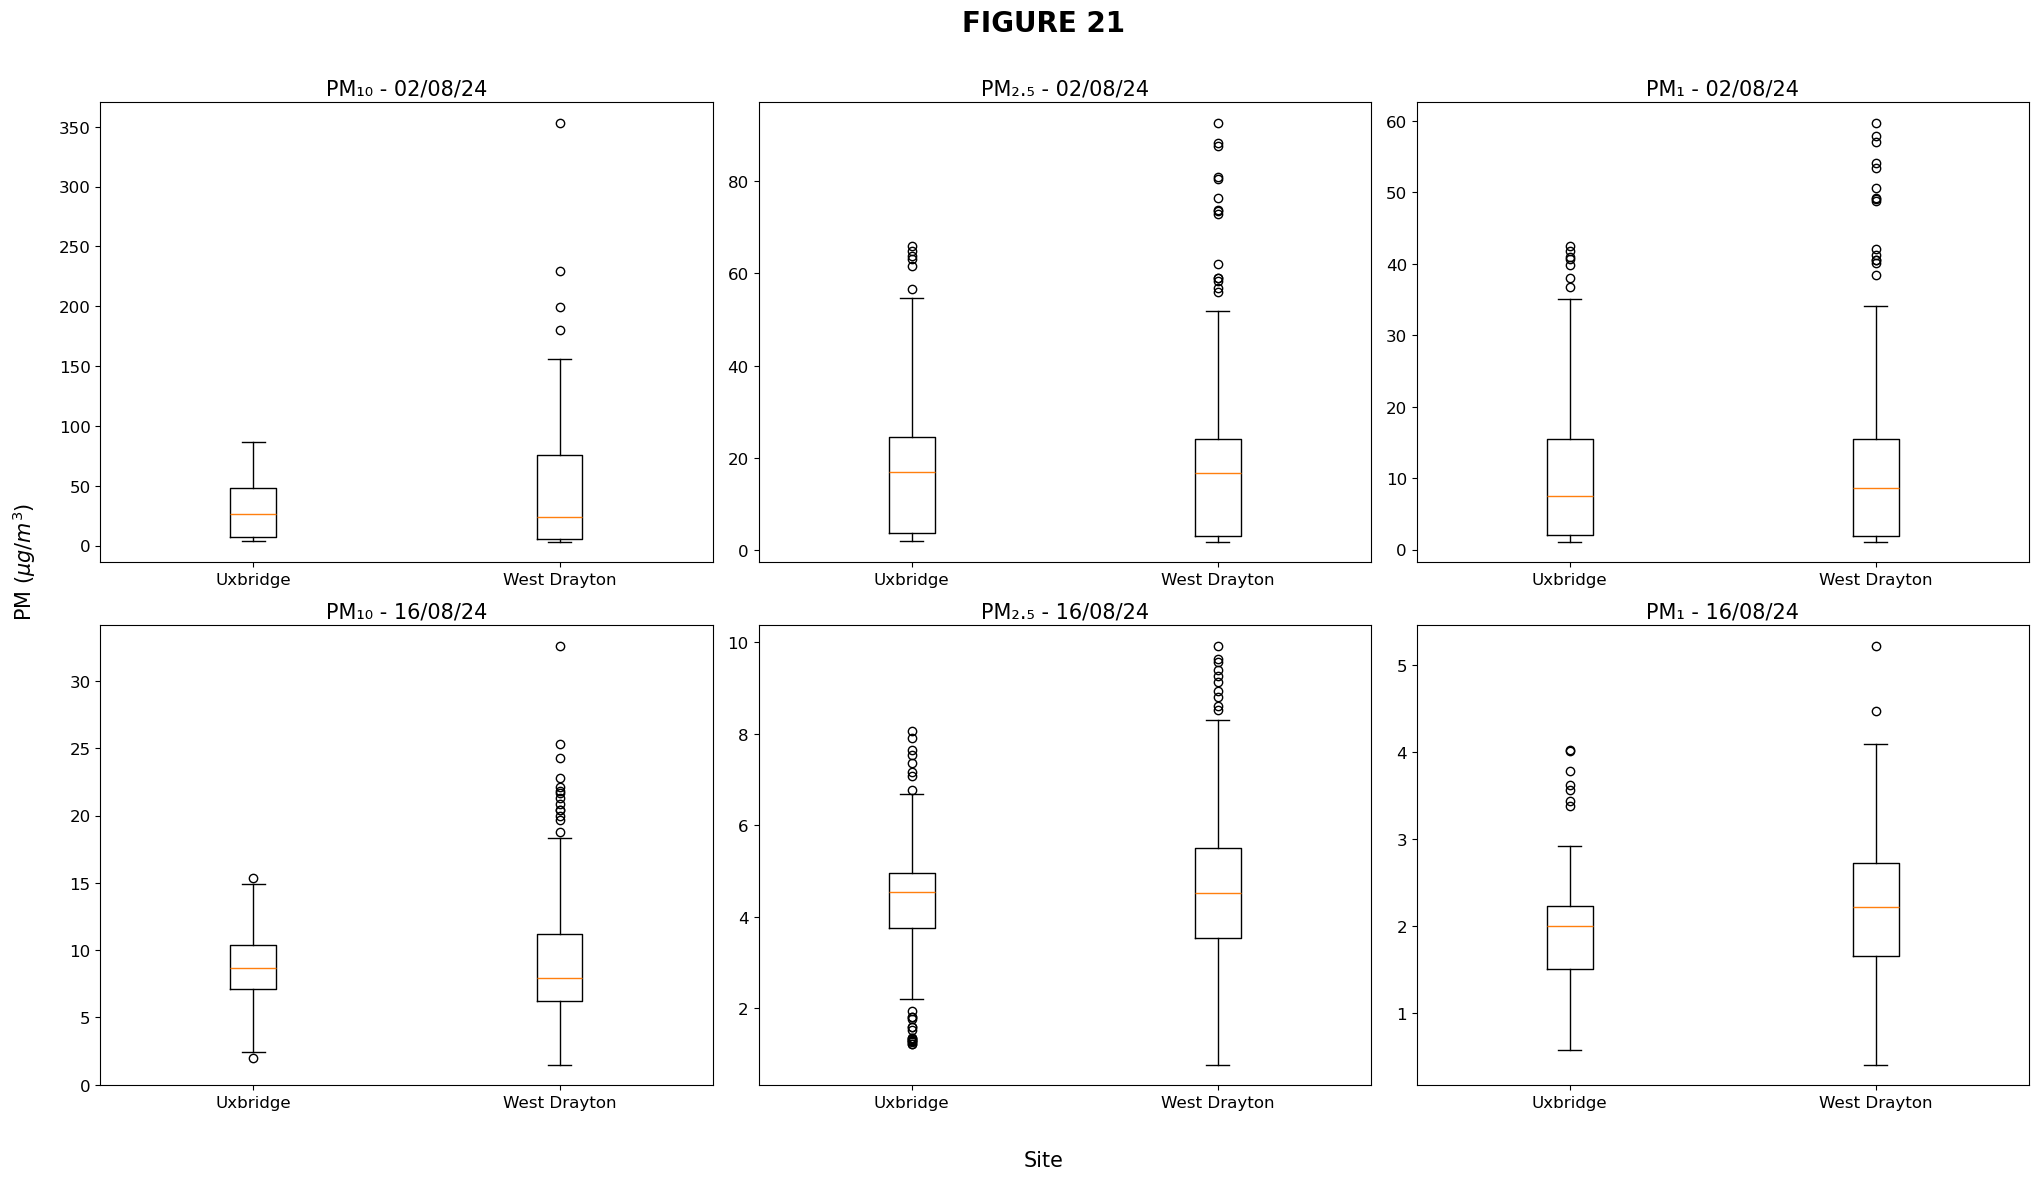

In [48]:
''' Test Site First Week Vs Second Week Boxplot '''

file_path_1 = '/Users/ahmad/Documents/NERC Internship/Data/Excel/Actual Data/Dust/Control Site/4693_2:8:24_control.xlsx'
file_path_2 = '/Users/ahmad/Documents/NERC Internship/Data/Excel/Actual Data/Dust/Control Site/4693_16:8:24_control.xlsx'
file_path_3 = '/Users/ahmad/Documents/NERC Internship/Data/Excel/Actual Data/Dust/Test Site/4573_2:8:24_test.xlsx'
file_path_4 = '/Users/ahmad/Documents/NERC Internship/Data/Excel/Actual Data/Dust/Test Site/4573_16:8:24_test.xlsx'

# Read data
df1 = pd.read_excel(file_path_1, engine='openpyxl')
df2 = pd.read_excel(file_path_2, engine='openpyxl')
df3 = pd.read_excel(file_path_3, engine='openpyxl')
df4 = pd.read_excel(file_path_4, engine='openpyxl')

# Convert 'Date Time' column to datetime
df1['Date Time'] = pd.to_datetime(df1['Date Time'], dayfirst=True)
df2['Date Time'] = pd.to_datetime(df2['Date Time'], dayfirst=True)
df3['Date Time'] = pd.to_datetime(df3['Date Time'], dayfirst=True)
df4['Date Time'] = pd.to_datetime(df4['Date Time'], dayfirst=True)

# Create subplots for box plots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# PM types and titles
pm_types = ['PM10 particles (ug/m^3)', 'PM2.5 particles (ug/m^3)', 'PM1 particles (ug/m^3)']
titles = ['PM₁₀', 'PM₂.₅', 'PM₁']

# Plotting for 02/08/24
for i, pm_type in enumerate(pm_types):
    ax = axes[0, i]
    data = [df1[pm_type], df3[pm_type]]
    ax.boxplot(data, labels=['Uxbridge', 'West Drayton'])
    
    ax.set_title(f'{titles[i]} - 02/08/24', fontsize=15, pad=5)
    ax.tick_params(axis='both', which='major', labelsize=12)

# Plotting for 16/08/24
for i, pm_type in enumerate(pm_types):
    ax = axes[1, i]
    data = [df2[pm_type], df4[pm_type]]
    ax.boxplot(data, labels=['Uxbridge', 'West Drayton'])
    
    ax.set_title(f'{titles[i]} - 16/08/24', fontsize=15, pad=5)
    ax.tick_params(axis='both', which='major', labelsize=12)

# Common labels
fig.text(-0.01, 0.5, 'PM ($μg/m^{3}$)', va='center', ha='center', rotation='vertical', fontsize=15)
fig.text(0.5, 0.001, 'Site', va='center', ha='center', fontsize=15)

# Title
plt.suptitle('FIGURE 21', fontweight='bold', fontsize=20, y=0.96)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig('/Users/ahmad/Pictures/NERC/Figures/Figure_21', dpi=300)

plt.show()